# Introduction to Human Activity Recognition

Here we will explore some common ways of preprocessing human activity recognition data.

Using the example data we will learn:
* how to merge multiple files into one large DataFrame
* how to split data into sliding windows
* how to quickly extract features from a window
* how to set the number of classes considered for classification
* how to build a simple Random Forest Classifier and train it on HAR data
* how to build a simple CNN and train it on HAR data 

Bear in mind that the sample data offered is not cleaned or high quality. You should not use it in your own experiments but it is useful for this tutorial.

You will need the following packages: 
* tsfresh
* scikit-learn
* tensorflow

#### Basic imports

In [1]:
import pandas as pd
import numpy as np
import tsfresh
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import tensorflow as tf

import os

import matplotlib.pyplot as plt

# keras goodies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, Dropout, MaxPooling1D, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import metrics as kmetrics
import tensorflow.keras.backend as K

## Loading multiple files into one large DataFrame

At this stage you should only be working with clean data, saved in the format required for Coursework 1. An example of such data can be found in the Data/Clean/ folder.

In [2]:
base_df = pd.DataFrame()

clean_data_folder = "train_data"

for filename in os.listdir(clean_data_folder):
    if "Falling" not in filename:
        full_path = f"{clean_data_folder}/{filename}"
        print(full_path)

        # load data into a DataFrame
        new_df = pd.read_csv(full_path)

        # merge into the base DataFrame
        base_df = pd.concat([base_df, new_df])

train_data/Respeck_s1714206_Climbing_stairs.csv
train_data/Respeck_s1714206_Descending_stairs.csv
train_data/Respeck_s1714206_Desk_work.csv
train_data/Respeck_s1714206_Lying down left.csv
train_data/Respeck_s1714206_Lying_down_on_back.csv
train_data/Respeck_s1714206_Lying_down_on_stomach.csv
train_data/Respeck_s1714206_Lying_down_right.csv
train_data/Respeck_s1714206_Movement.csv
train_data/Respeck_s1714206_Running.csv
train_data/Respeck_s1714206_Sitting.csv
train_data/Respeck_s1714206_Sitting_bent_backwards.csv
train_data/Respeck_s1714206_Sitting_bent_forward.csv
train_data/Respeck_s1714206_Walking.csv
train_data/Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43.csv
train_data/Respeck_s1541031_Descending stairs_06-10-2021_11-25-05.csv
train_data/Respeck_s1541031_Desk work_06-10-2021_11-04-49.csv
train_data/Respeck_s1541031_Lying down left_06-10-2021_14-30-04.csv
train_data/Respeck_s1541031_Lying down on back_06-10-2021_11-15-13.csv
train_data/Respeck_s1541031_Lying down on stomach_

train_data/Respeck_s1727780_Running_29-09-2021_21-27-29.csv
train_data/Respeck_s1727780_Sitting_29-09-2021_21-38-44.csv
train_data/Respeck_s1727780_Sitting bent backward_29-09-2021_21-40-08.csv
train_data/Respeck_s1727780_Sitting bent forward_29-09-2021_21-39-24.csv
train_data/Respeck_s1727780_Standing_29-09-2021_21-40-57.csv
train_data/Respeck_s1727780_Walking at normal speed_29-09-2021_21-28-37.csv
train_data/Respeck_s1732873_Climbing stairs_04-10-2021_16-00-19.csv
train_data/Respeck_s1732873_Descending stairs_04-10-2021_16-02-14.csv
train_data/Respeck_s1732873_Desk work_04-10-2021_13-03-22.csv
train_data/Respeck_s1732873_Lying down left_04-10-2021_13-00-51.csv
train_data/Respeck_s1732873_Lying down on back_04-10-2021_12-57-16.csv
train_data/Respeck_s1732873_Lying down on stomach_04-10-2021_13-01-40.csv
train_data/Respeck_s1732873_Lying down right_04-10-2021_13-00-02.csv
train_data/Respeck_s1732873_Movement_04-10-2021_16-10-37.csv
train_data/Respeck_s1732873_Running_04-10-2021_15-32-

train_data/Respeck_s1822958_Sitting bent forward_30-09-2021_17-15-20.csv
train_data/Respeck_s1822958_Standing_29-09-2021_17-10-05.csv
train_data/Respeck_s1822958_Walking at normal speed_29-09-2021_16-56-34.csv
train_data/Respeck_s1823274_Climbing stairs_29-09-2021_15-12-47.csv
train_data/Respeck_s1823274_Descending stairs_29-09-2021_12-42-24.csv
train_data/Respeck_s1823274_Desk work_29-09-2021_12-35-12.csv
train_data/Respeck_s1823274_Lying down left_29-09-2021_12-26-28.csv
train_data/Respeck_s1823274_Lying down on back_29-09-2021_12-25-45.csv
train_data/Respeck_s1823274_Lying down on stomach_29-09-2021_12-27-51.csv
train_data/Respeck_s1823274_Lying down right_29-09-2021_12-27-07.csv
train_data/Respeck_s1823274_Movement_29-09-2021_12-34-25.csv
train_data/Respeck_s1823274_Running_29-09-2021_15-11-43.csv
train_data/Respeck_s1823274_Sitting_29-09-2021_12-20-53.csv
train_data/Respeck_s1823274_Sitting bent backward_29-09-2021_12-22-22.csv
train_data/Respeck_s1823274_Sitting bent forward_29-0

train_data/Respeck_s1865890_Desk work_05-10-2021_18-26-33.csv
train_data/Respeck_s1865890_Lying down left_05-10-2021_18-18-11.csv
train_data/Respeck_s1865890_Lying down on back_05-10-2021_18-17-22.csv
train_data/Respeck_s1865890_Lying down on stomach_05-10-2021_18-20-06.csv
train_data/Respeck_s1865890_Lying down right_05-10-2021_18-19-15.csv
train_data/Respeck_s1865890_Movement_06-10-2021_09-57-59.csv
train_data/Respeck_s1865890_Running_06-10-2021_10-07-41.csv
train_data/Respeck_s1865890_Sitting_06-10-2021_10-31-42.csv
train_data/Respeck_s1865890_Sitting bent backward_05-10-2021_18-14-54.csv
train_data/Respeck_s1865890_Sitting bent forward_05-10-2021_18-10-45.csv
train_data/Respeck_s1865890_Standing_05-10-2021_18-16-13.csv
train_data/Respeck_s1865890_Walking at normal speed_06-10-2021_10-06-40.csv
train_data/Respeck_s1870467_Climbing stairs_06-10-2021_11-26-24.csv
train_data/Respeck_s1870467_Descending stairs_06-10-2021_11-27-15.csv
train_data/Respeck_s1870467_Desk work_07-10-2021_12-1

train_data/Respeck_s2125423_Running_03-10-2021_17-35-53.csv
train_data/Respeck_s2125423_Sitting_03-10-2021_15-49-17.csv
train_data/Respeck_s2125423_Sitting bent backward_03-10-2021_15-52-10.csv
train_data/Respeck_s2125423_Sitting bent forward_03-10-2021_15-50-43.csv
train_data/Respeck_s2125423_Standing_03-10-2021_15-53-38.csv
train_data/Respeck_s2125423_Walking at normal speed_03-10-2021_17-34-03.csv
train_data/Respeck_s2171825_Climbing stairs_03-10-2021_22-07-31.csv
train_data/Respeck_s2171825_Descending stairs_03-10-2021_22-04-18.csv
train_data/Respeck_s2171825_Desk work_03-10-2021_21-35-02.csv
train_data/Respeck_s2171825_Lying down left_03-10-2021_21-25-23.csv
train_data/Respeck_s2171825_Lying down on back_03-10-2021_21-33-28.csv
train_data/Respeck_s2171825_Lying down on stomach_03-10-2021_21-28-45.csv
train_data/Respeck_s2171825_Lying down right_03-10-2021_21-26-27.csv
train_data/Respeck_s2171825_Movement_03-10-2021_21-37-12.csv
train_data/Respeck_s2171825_Running_03-10-2021_22-06-

train_data/Respeck_s2250677_Sitting bent forward_04-10-2021_16-07-07.csv
train_data/Respeck_s2250677_Standing_04-10-2021_16-09-34.csv
train_data/Respeck_s2250677_Walking at normal speed_04-10-2021_16-20-14.csv
train_data/Respeck_s2254050_Climbing stairs_29-09-2021_19-37-34.csv
train_data/Respeck_s2254050_Descending stairs_29-09-2021_19-38-09.csv
train_data/Respeck_s2254050_Desk work_02-10-2021_17-19-19.csv
train_data/Respeck_s2254050_Lying down left_29-09-2021_19-10-17.csv
train_data/Respeck_s2254050_Lying down on back_06-10-2021_09-23-09.csv
train_data/Respeck_s2254050_Lying down on stomach_29-09-2021_19-11-30.csv
train_data/Respeck_s2254050_Lying down right_29-09-2021_19-10-54.csv
train_data/Respeck_s2254050_Movement_29-09-2021_19-12-14.csv
train_data/Respeck_s2254050_Running_29-09-2021_19-35-27.csv
train_data/Respeck_s2254050_Sitting_02-10-2021_17-27-52.csv
train_data/Respeck_s2254050_Sitting bent backward_02-10-2021_17-32-32.csv
train_data/Respeck_s2254050_Sitting bent forward_29-0

train_data/Thingy_s1724067_Lying down on stomach_06-10-2021_20-19-55.csv
train_data/Thingy_s1724067_Lying down right_06-10-2021_20-18-42.csv
train_data/Thingy_s1724067_Movement_06-10-2021_20-23-00.csv
train_data/Thingy_s1724067_Sitting_06-10-2021_20-05-12.csv
train_data/Thingy_s1724067_Sitting bent backward_06-10-2021_20-06-11.csv
train_data/Thingy_s1724067_Sitting bent forward_06-10-2021_20-07-11.csv
train_data/Thingy_s1724067_Standing_06-10-2021_20-11-25.csv
train_data/Thingy_s1724067_Walking at normal speed_06-10-2021_19-53-02.csv
train_data/Thingy_s1724279_Climbing stairs_29-09-2021_13-03-42.csv
train_data/Thingy_s1724279_Descending stairs_29-09-2021_13-04-35.csv
train_data/Thingy_s1724279_Desk work_06-10-2021_12-35-04.csv
train_data/Thingy_s1724279_Lying down left_29-09-2021_12-57-55.csv
train_data/Thingy_s1724279_Lying down on back_29-09-2021_12-56-31.csv
train_data/Thingy_s1724279_Lying down on stomach_29-09-2021_12-59-46.csv
train_data/Thingy_s1724279_Lying down right_07-10-202

train_data/Thingy_s1817455_Lying down right_29-09-2021_14-41-01.csv
train_data/Thingy_s1817455_Movement_29-09-2021_14-49-30.csv
train_data/Thingy_s1817455_Running_29-09-2021_14-58-21.csv
train_data/Thingy_s1817455_Sitting_29-09-2021_14-21-18.csv
train_data/Thingy_s1817455_Sitting bent backward_29-09-2021_14-25-28.csv
train_data/Thingy_s1817455_Sitting bent forward_29-09-2021_14-23-21.csv
train_data/Thingy_s1817455_Standing_29-09-2021_14-27-26.csv
train_data/Thingy_s1817455_Walking at normal speed_29-09-2021_14-55-03.csv
train_data/Thingy_s1817972_Climbing stairs_06-10-2021_09-19-43.csv
train_data/Thingy_s1817972_Descending stairs_06-10-2021_09-18-58.csv
train_data/Thingy_s1817972_Desk work_06-10-2021_09-23-17.csv
train_data/Thingy_s1817972_Lying down left_06-10-2021_09-14-21.csv
train_data/Thingy_s1817972_Lying down on back_06-10-2021_09-13-36.csv
train_data/Thingy_s1817972_Lying down on stomach_06-10-2021_09-16-09.csv
train_data/Thingy_s1817972_Lying down right_06-10-2021_09-15-16.csv

train_data/Thingy_s1826390_Lying down left_07-10-2021_01-40-26.csv
train_data/Respeck_s1817967_Lying down left_30-09-2022_16-25-54.csv
train_data/Thingy_s1826390_Lying down on back_07-10-2021_01-35-08.csv
train_data/Respeck_s1817967_Lying down on back_30-09-2022_16-24-43.csv
train_data/Thingy_s1826390_Lying down on stomach_07-10-2021_01-45-27.csv
train_data/Respeck_s1817967_Lying down on stomach_30-09-2022_16-27-33.csv
train_data/Thingy_s1826390_Lying down right_07-10-2021_01-43-04.csv
train_data/Respeck_s1817967_Lying down right_30-09-2022_16-26-44.csv
train_data/Thingy_s1826390_Movement_07-10-2021_18-47-05.csv
train_data/Respeck_s1817967_Movement_30-09-2022_16-35-29.csv
train_data/Respeck_s1817967_Running_30-09-2022_16-30-26.csv
train_data/Thingy_s1826390_Sitting_07-10-2021_00-40-55.csv
train_data/Respeck_s1817967_Sitting_30-09-2022_16-19-45.csv
train_data/Thingy_s1826390_Sitting bent backward_07-10-2021_00-44-10.csv
train_data/Respeck_s1817967_Sitting bent backward_30-09-2022_16-21-

train_data/Thingy_s1850642_Lying down left_29-09-2021_13-18-56.csv
train_data/Respeck_s1836526_Lying down on stomach_23-09-2022_13-24-23.csv
train_data/Respeck_s1836526_Lying down right_23-09-2022_13-23-05.csv
train_data/Thingy_s1850642_Lying down on back_29-09-2021_13-18-10.csv
train_data/Respeck_s1836526_Movement_23-09-2022_13-08-51.csv
train_data/Thingy_s1850642_Lying down on stomach_29-09-2021_13-20-54.csv
train_data/Respeck_s1836526_Running_23-09-2022_13-07-03.csv
train_data/Thingy_s1850642_Lying down right_29-09-2021_13-20-04.csv
train_data/Respeck_s1836526_Sitting_23-09-2022_13-31-03.csv
train_data/Thingy_s1850642_Movement_29-09-2021_13-27-54.csv
train_data/Respeck_s1836526_Sitting bent backward_23-09-2022_13-33-29.csv
train_data/Respeck_s1836526_Sitting bent forward_23-09-2022_13-32-16.csv
train_data/Thingy_s1850642_Sitting_29-09-2021_12-49-46.csv
train_data/Respeck_s1836526_Standing_23-09-2022_13-34-57.csv
train_data/Thingy_s1850642_Sitting bent backward_29-09-2021_13-16-26.cs

train_data/Respeck_s1853226_Lying down on stomach_28-09-2022_16-31-43.csv
train_data/Respeck_s1853226_Lying down right_28-09-2022_16-24-19.csv
train_data/Respeck_s1853226_Movement_28-09-2022_16-33-59.csv
train_data/Respeck_s1853226_Running_28-09-2022_16-55-34.csv
train_data/Respeck_s1853226_Sitting_28-09-2022_16-11-24.csv
train_data/Thingy_s1870467_Lying down left_29-09-2021_11-47-22.csv
train_data/Respeck_s1853226_Sitting bent backward_28-09-2022_16-15-24.csv
train_data/Thingy_s1870467_Lying down on back_29-09-2021_11-46-33.csv
train_data/Respeck_s1853226_Sitting bent forward_28-09-2022_16-12-21.csv
train_data/Thingy_s1870467_Lying down on stomach_29-09-2021_11-49-02.csv
train_data/Respeck_s1853226_Standing_28-09-2022_16-17-29.csv
train_data/Thingy_s1870467_Lying down right_29-09-2021_11-48-12.csv
train_data/Respeck_s1853226_Walking at normal speed_28-09-2022_16-53-27.csv
train_data/Thingy_s1870467_Movement_29-09-2021_11-56-04.csv
train_data/Respeck_s1858629_Climbing stairs_22-09-2022

train_data/Respeck_s1892493_Lying down on stomach_28-09-2022_14-44-29.csv
train_data/Thingy_s1893835_Descending stairs_06-10-2021_11-22-44.csv
train_data/Respeck_s1892493_Lying down right_28-09-2022_14-49-57.csv
train_data/Thingy_s1893835_Desk work_29-09-2021_11-01-15.csv
train_data/Respeck_s1892493_Movement_28-09-2022_15-13-44.csv
train_data/Thingy_s1893835_Lying down left_29-09-2021_10-58-52.csv
train_data/Respeck_s1892493_Running_28-09-2022_15-06-19.csv
train_data/Thingy_s1893835_Lying down on back_29-09-2021_10-57-13.csv
train_data/Thingy_s1893835_Sitting_29-09-2021_10-53-14.csv
train_data/Respeck_s1892493_Sitting_28-09-2022_14-30-05.csv
train_data/Thingy_s1893835_Lying down on stomach_29-09-2021_10-59-44.csv
train_data/Respeck_s1892493_Sitting bent backward_28-09-2022_14-33-02.csv
train_data/Thingy_s1893835_Lying down right_29-09-2021_10-58-05.csv
train_data/Respeck_s1892493_Sitting bent forward_28-09-2022_14-30-54.csv
train_data/Thingy_s1893835_Movement_29-09-2021_11-13-52.csv
tr

train_data/Respeck_s1909083_Lying down right_30-09-2022_02-06-48.csv
train_data/Thingy_s2125423_Descending stairs_03-10-2021_17-23-15.csv
train_data/Respeck_s1909083_Movement_30-09-2022_03-24-27.csv
train_data/Thingy_s2125423_Desk work_03-10-2021_16-07-18.csv
train_data/Respeck_s1909083_Running_30-09-2022_02-18-24.csv
train_data/Respeck_s1909083_Sitting_30-09-2022_01-51-02.csv
train_data/Respeck_s1909083_Sitting bent backward_30-09-2022_01-52-16.csv
train_data/Respeck_s1909083_Sitting bent forward_30-09-2022_01-39-13.csv
train_data/Respeck_s1909083_Standing_30-09-2022_01-57-02.csv
train_data/Thingy_s2125423_Lying down left_03-10-2021_15-56-19.csv
train_data/Respeck_s1909083_Walking at normal speed_30-09-2022_02-13-45.csv
train_data/Thingy_s2125423_Lying down on back_03-10-2021_15-59-43.csv
train_data/Respeck_s1910268_Climbing stairs_03-10-2022_18-12-57.csv
train_data/Thingy_s2125423_Lying down on stomach_03-10-2021_16-02-14.csv
train_data/Respeck_s1910268_Descending stairs_03-10-2022_1

train_data/Respeck_s1912614_Lying down right_03-10-2022_20-49-17.csv
train_data/Thingy_s2173036_Standing_03-10-2021_22-39-54.csv
train_data/Respeck_s1912614_Movement_03-10-2022_20-46-28.csv
train_data/Thingy_s2173036_Walking at normal speed_03-10-2021_23-03-07.csv
train_data/Respeck_s1912614_Running_03-10-2022_21-16-46.csv
train_data/Thingy_s2181154_Climbing stairs_03-10-2021_17-17-08.csv
train_data/Respeck_s1912614_Sitting_01-10-2022_15-19-35.csv
train_data/Thingy_s2181154_Descending stairs_03-10-2021_17-16-29.csv
train_data/Respeck_s1912614_Sitting bent backward_01-10-2022_13-58-23.csv
train_data/Thingy_s2181154_Running_29-09-2021_13-41-46.csv
train_data/Thingy_s2181154_Desk work_03-10-2021_17-10-22.csv
train_data/Respeck_s1912614_Sitting bent forward_01-10-2022_14-28-38.csv
train_data/Respeck_s1912614_Standing_03-10-2022_20-52-19.csv
train_data/Respeck_s1912614_Walking at normal speed_02-10-2022_19-19-18.csv
train_data/Respeck_s1915425_Climbing stairs_28-09-2022_14-02-24.csv
train_d

train_data/Respeck_s1921856_Movement_29-09-2022_15-37-13.csv
train_data/Thingy_s2211228_Sitting bent forward_29-09-2021_16-45-26.csv
train_data/Respeck_s1921856_Running_29-09-2022_16-09-39.csv
train_data/Thingy_s2211228_Standing_06-10-2021_19-41-21.csv
train_data/Respeck_s1921856_Sitting_03-10-2022_18-57-36.csv
train_data/Thingy_s2211228_Walking at normal speed_06-10-2021_19-48-08.csv
train_data/Respeck_s1921856_Sitting bent backward_29-09-2022_15-31-44.csv
train_data/Thingy_s2212045_Climbing stairs_29-09-2021_13-37-28.csv
train_data/Respeck_s1921856_Sitting bent forward_29-09-2022_15-30-59.csv
train_data/Thingy_s2212045_Descending stairs_29-09-2021_13-36-47.csv
train_data/Respeck_s1921856_Standing_29-09-2022_15-32-32.csv
train_data/Thingy_s2212045_Desk work_29-09-2021_11-59-56.csv
train_data/Respeck_s1921856_Walking at normal speed_29-09-2022_15-51-52.csv
train_data/Respeck_s1923449_Climbing stairs_28-09-2022_15-53-00.csv
train_data/Thingy_s2212045_Running_29-09-2021_13-38-58.csv
trai

train_data/Respeck_s1926989_Desk work_03-10-2022_17-08-04.csv
train_data/Respeck_s1926989_Lying down left_03-10-2022_17-04-42.csv
train_data/Respeck_s1926989_Lying down on back_03-10-2022_17-04-02.csv
train_data/Respeck_s1926989_Lying down on stomach_03-10-2022_17-06-19.csv
train_data/Respeck_s1926989_Lying down right_03-10-2022_17-05-36.csv
train_data/Respeck_s1926989_Movement_03-10-2022_17-07-08.csv
train_data/Respeck_s1926989_Running_03-10-2022_17-13-11.csv
train_data/Respeck_s1926989_Sitting_03-10-2022_17-01-17.csv
train_data/Respeck_s1926989_Sitting bent backward_03-10-2022_17-02-32.csv
train_data/Respeck_s1926989_Sitting bent forward_03-10-2022_17-01-54.csv
train_data/Respeck_s1926989_Standing_03-10-2022_17-03-12.csv
train_data/Respeck_s1926989_Walking at normal speed_03-10-2022_17-11-41.csv
train_data/Respeck_s1927811_Climbing stairs_01-10-2022_20-41-41.csv
train_data/Respeck_s1927811_Descending stairs_01-10-2022_20-42-41.csv
train_data/Respeck_s1927811_Desk work_29-09-2022_12-1

train_data/Respeck_s1957847_Climbing stairs_05-10-2022_17-05-30.csv
train_data/Respeck_s1957847_Descending stairs_05-10-2022_17-04-39.csv
train_data/Respeck_s1957847_Desk work_05-10-2022_13-55-03.csv
train_data/Respeck_s1957847_Lying down left_05-10-2022_10-56-09.csv
train_data/Respeck_s1957847_Lying down on back_05-10-2022_10-51-45.csv
train_data/Respeck_s1957847_Lying down on stomach_05-10-2022_10-57-15.csv
train_data/Respeck_s1957847_Lying down right_05-10-2022_13-59-03.csv
train_data/Respeck_s1957847_Movement_05-10-2022_11-12-30.csv
train_data/Respeck_s1957847_Running_05-10-2022_11-22-43.csv
train_data/Respeck_s1957847_Sitting_05-10-2022_13-40-26.csv
train_data/Respeck_s1957847_Sitting bent backward_05-10-2022_13-44-16.csv
train_data/Respeck_s1957847_Sitting bent forward_05-10-2022_13-48-22.csv
train_data/Respeck_s1957847_Standing_28-09-2022_10-34-06.csv
train_data/Respeck_s1957847_Walking at normal speed_05-10-2022_11-20-52.csv
train_data/Respeck_s1957945_Climbing stairs_05-10-202

train_data/Respeck_s1973139_Sitting bent forward_24-09-2022_13-51-20.csv
train_data/Respeck_s1973139_Standing_24-09-2022_14-03-16.csv
train_data/Respeck_s1973139_Walking at normal speed_24-09-2022_14-24-25.csv
train_data/Respeck_s1973235_Climbing stairs_23-09-2022_15-09-08.csv
train_data/Respeck_s1973235_Descending stairs_23-09-2022_15-09-50.csv
train_data/Respeck_s1973235_Desk work_23-09-2022_16-02-01.csv
train_data/Respeck_s1973235_Lying down left_02-10-2022_17-52-02.csv
train_data/Respeck_s1973235_Lying down on back_23-09-2022_15-46-21.csv
train_data/Respeck_s1973235_Lying down on stomach_01-10-2022_15-06-40.csv
train_data/Respeck_s1973235_Lying down right_02-10-2022_17-52-46.csv
train_data/Respeck_s1973235_Movement_23-09-2022_15-51-17.csv
train_data/Respeck_s1973235_Running_23-09-2022_15-44-56.csv
train_data/Respeck_s1973235_Sitting_02-10-2022_17-22-09.csv
train_data/Respeck_s1973235_Sitting bent backward_23-09-2022_14-58-47.csv
train_data/Respeck_s1973235_Sitting bent forward_02-1

train_data/Respeck_s2269664_Lying down right_24-09-2022_15-19-17.csv
train_data/Respeck_s2269664_Movement_24-09-2022_15-59-32.csv
train_data/Respeck_s2269664_Running_24-09-2022_15-33-57.csv
train_data/Respeck_s2269664_Sitting_24-09-2022_15-01-45.csv
train_data/Respeck_s2269664_Sitting bent backward_03-10-2022_20-43-11.csv
train_data/Respeck_s2269664_Sitting bent forward_24-09-2022_15-05-05.csv
train_data/Respeck_s2269664_Standing_03-10-2022_20-49-51.csv
train_data/Respeck_s2269664_Walking at normal speed_24-09-2022_15-31-41.csv
train_data/Respeck_s2298733_Climbing stairs_30-09-2022_16-37-07.csv
train_data/Respeck_s2298733_Descending stairs_30-09-2022_16-37-44.csv
train_data/Respeck_s2298733_Desk work_30-09-2022_16-39-10.csv
train_data/Respeck_s2298733_Lying down left_30-09-2022_16-32-31.csv
train_data/Respeck_s2298733_Lying down on back_30-09-2022_16-31-50.csv
train_data/Respeck_s2298733_Lying down on stomach_30-09-2022_16-33-56.csv
train_data/Respeck_s2298733_Lying down right_30-09-20

train_data/Thingy_s1809887_Lying down left_27-09-2022_15-01-30.csv
train_data/Thingy_s1809887_Lying down on back_27-09-2022_14-59-19.csv
train_data/Thingy_s1809887_Lying down on stomach_27-09-2022_15-04-45.csv
train_data/Thingy_s1809887_Lying down right_27-09-2022_15-02-34.csv
train_data/Thingy_s1809887_Movement_27-09-2022_15-12-19.csv
train_data/Thingy_s1809887_Running_29-09-2022_12-35-08.csv
train_data/Thingy_s1809887_Sitting_27-09-2022_14-49-34.csv
train_data/Thingy_s1809887_Sitting bent backward_27-09-2022_14-57-28.csv
train_data/Thingy_s1809887_Sitting bent forward_27-09-2022_14-54-44.csv
train_data/Thingy_s1809887_Standing_27-09-2022_14-50-31.csv
train_data/Thingy_s1809887_Walking at normal speed_27-09-2022_15-40-34.csv
train_data/Thingy_s1810150_Climbing stairs_22-09-2022_19-36-55.csv
train_data/Thingy_s1810150_Descending stairs_22-09-2022_19-48-17.csv
train_data/Thingy_s1810150_Desk work_04-10-2022_20-01-25.csv
train_data/Thingy_s1810150_Lying down left_22-09-2022_15-50-36.csv


train_data/Thingy_s1839825_Climbing stairs_22-09-2022_13-42-56.csv
train_data/Thingy_s1839825_Descending stairs_22-09-2022_13-44-13.csv
train_data/Thingy_s1839825_Desk work_22-09-2022_13-37-54.csv
train_data/Thingy_s1839825_Lying down left_22-09-2022_13-31-49.csv
train_data/Thingy_s1839825_Lying down on back_22-09-2022_13-29-37.csv
train_data/Thingy_s1839825_Lying down on stomach_22-09-2022_13-35-03.csv
train_data/Thingy_s1839825_Lying down right_22-09-2022_13-33-39.csv
train_data/Thingy_s1839825_Movement_22-09-2022_13-39-36.csv
train_data/Thingy_s1839825_Running_22-09-2022_14-55-41.csv
train_data/Thingy_s1839825_Sitting_22-09-2022_13-25-37.csv
train_data/Thingy_s1839825_Sitting bent backward_22-09-2022_13-27-03.csv
train_data/Thingy_s1839825_Sitting bent forward_22-09-2022_13-26-20.csv
train_data/Thingy_s1839825_Standing_22-09-2022_13-27-46.csv
train_data/Thingy_s1839825_Walking at normal speed_22-09-2022_14-54-17.csv
train_data/Thingy_s1842855_Climbing stairs_04-10-2022_17-05-03.csv


train_data/Thingy_s1900673_Climbing stairs_03-10-2022_18-34-40.csv
train_data/Thingy_s1900673_Descending stairs_03-10-2022_19-51-38.csv
train_data/Thingy_s1900673_Desk work_04-10-2022_00-32-48.csv
train_data/Thingy_s1900673_Lying down left_04-10-2022_00-52-43.csv
train_data/Thingy_s1900673_Lying down on back_04-10-2022_00-55-50.csv
train_data/Thingy_s1900673_Lying down on stomach_04-10-2022_00-56-46.csv
train_data/Thingy_s1900673_Lying down right_04-10-2022_00-54-57.csv
train_data/Thingy_s1900673_Movement_04-10-2022_00-42-40.csv
train_data/Thingy_s1900673_Running_01-10-2022_20-38-35.csv
train_data/Thingy_s1900673_Sitting_04-10-2022_01-07-07.csv
train_data/Thingy_s1900673_Sitting bent backward_04-10-2022_01-08-52.csv
train_data/Thingy_s1900673_Sitting bent forward_04-10-2022_01-07-53.csv
train_data/Thingy_s1900673_Standing_04-10-2022_01-20-04.csv
train_data/Thingy_s1900673_Walking at normal speed_04-10-2022_23-09-02.csv
train_data/Thingy_s1901843_Climbing stairs_06-10-2022_18-14-53.csv


train_data/Thingy_s1912614_Climbing stairs_02-10-2022_17-51-29.csv
train_data/Thingy_s1912614_Descending stairs_02-10-2022_17-46-04.csv
train_data/Thingy_s1912614_Desk work_01-10-2022_14-00-39.csv
train_data/Thingy_s1912614_Lying down left_01-10-2022_15-11-40.csv
train_data/Thingy_s1912614_Lying down on back_01-10-2022_14-41-45.csv
train_data/Thingy_s1912614_Lying down on stomach_01-10-2022_14-49-18.csv
train_data/Thingy_s1912614_Lying down right_01-10-2022_22-16-53.csv
train_data/Thingy_s1912614_Movement_01-10-2022_22-23-06.csv
train_data/Thingy_s1912614_Running_02-10-2022_19-53-34.csv
train_data/Thingy_s1912614_Sitting_01-10-2022_22-22-05.csv
train_data/Thingy_s1912614_Sitting bent backward_01-10-2022_13-58-56.csv
train_data/Thingy_s1912614_Sitting bent forward_01-10-2022_13-57-26.csv
train_data/Thingy_s1912614_Standing_02-10-2022_21-49-34.csv
train_data/Thingy_s1912614_Walking at normal speed_02-10-2022_19-21-50.csv
train_data/Thingy_s1915425_Climbing stairs_28-09-2022_14-03-45.csv


train_data/Thingy_s1925709_Climbing stairs_02-10-2022_17-41-08.csv
train_data/Thingy_s1925709_Descending stairs_02-10-2022_17-41-49.csv
train_data/Thingy_s1925709_Desk work_02-10-2022_22-12-24.csv
train_data/Thingy_s1925709_Lying down left_01-10-2022_16-04-22.csv
train_data/Thingy_s1925709_Lying down on back_02-10-2022_22-04-11.csv
train_data/Thingy_s1925709_Running_03-10-2022_22-15-03.csv
train_data/Thingy_s1925709_Lying down on stomach_02-10-2022_22-06-15.csv
train_data/Thingy_s1925709_Lying down right_01-10-2022_16-07-49.csv
train_data/Thingy_s1925709_Movement_01-10-2022_21-04-42.csv
train_data/Thingy_s1925709_Sitting_01-10-2022_20-59-39.csv
train_data/Thingy_s1925709_Sitting bent backward_01-10-2022_21-01-33.csv
train_data/Thingy_s1925709_Sitting bent forward_02-10-2022_22-11-06.csv
train_data/Thingy_s1925709_Standing_02-10-2022_21-53-58.csv
train_data/Thingy_s1925709_Walking at normal speed_03-10-2022_22-12-37.csv
train_data/Thingy_s1925715_Climbing stairs_28-09-2022_13-59-02.csv


train_data/Thingy_s1951735_Climbing stairs_03-10-2022_16-20-51.csv
train_data/Thingy_s1951735_Descending stairs_07-10-2022_02-37-13.csv
train_data/Thingy_s1951735_Desk work_03-10-2022_02-24-04.csv
train_data/Thingy_s1951735_Lying down left_03-10-2022_02-14-22.csv
train_data/Thingy_s1951735_Lying down on back_03-10-2022_02-12-18.csv
train_data/Thingy_s1951735_Lying down on stomach_03-10-2022_02-18-52.csv
train_data/Thingy_s1951735_Lying down right_03-10-2022_02-17-38.csv
train_data/Thingy_s1951735_Movement_03-10-2022_13-28-35.csv
train_data/Thingy_s1951735_Running_03-10-2022_14-00-25.csv
train_data/Thingy_s1951735_Sitting_03-10-2022_00-41-21.csv
train_data/Thingy_s1951735_Sitting bent backward_03-10-2022_00-47-39.csv
train_data/Thingy_s1951735_Sitting bent forward_03-10-2022_00-42-39.csv
train_data/Thingy_s1951735_Standing_03-10-2022_00-58-09.csv
train_data/Thingy_s1951735_Walking at normal speed_03-10-2022_14-47-58.csv
train_data/Thingy_s1956488_Climbing stairs_30-09-2022_15-37-36.csv


train_data/Thingy_s1967087_Standing_02-10-2022_15-11-01.csv
train_data/Thingy_s1967087_Walking at normal speed_02-10-2022_17-12-44.csv
train_data/Thingy_s1967984_Climbing stairs_06-10-2022_14-34-21.csv
train_data/Thingy_s1967984_Descending stairs_06-10-2022_14-35-33.csv
train_data/Thingy_s1967984_Desk work_03-10-2022_21-49-50.csv
train_data/Thingy_s1967984_Lying down left_24-09-2022_16-16-44.csv
train_data/Thingy_s1967984_Lying down on back_24-09-2022_16-16-00.csv
train_data/Thingy_s1967984_Lying down on stomach_24-09-2022_16-18-17.csv
train_data/Thingy_s1967984_Lying down right_24-09-2022_16-17-29.csv
train_data/Thingy_s1967984_Movement_24-09-2022_16-27-43.csv
train_data/Thingy_s1967984_Running_06-10-2022_14-46-05.csv
train_data/Thingy_s1967984_Sitting_03-10-2022_21-08-29.csv
train_data/Thingy_s1967984_Sitting bent backward_24-09-2022_16-14-05.csv
train_data/Thingy_s1967984_Sitting bent forward_24-09-2022_16-13-05.csv
train_data/Thingy_s1967984_Standing_24-09-2022_16-14-47.csv
train_d

train_data/Thingy_s1998909_Sitting_03-10-2022_16-03-03.csv
train_data/Thingy_s1998909_Sitting bent backward_03-10-2022_16-07-33.csv
train_data/Thingy_s1998909_Sitting bent forward_03-10-2022_16-05-01.csv
train_data/Thingy_s1998909_Standing_03-10-2022_16-11-19.csv
train_data/Thingy_s1998909_Walking at normal speed_03-10-2022_16-32-54.csv
train_data/Thingy_s2255740_Climbing stairs_01-10-2022_18-57-43.csv
train_data/Thingy_s2255740_Descending stairs_01-10-2022_18-58-24.csv
train_data/Thingy_s2255740_Desk work_01-10-2022_20-30-11.csv
train_data/Thingy_s2255740_Lying down left_01-10-2022_21-01-19.csv
train_data/Thingy_s2255740_Lying down on back_01-10-2022_21-00-03.csv
train_data/Thingy_s2255740_Lying down on stomach_01-10-2022_21-14-37.csv
train_data/Thingy_s2255740_Lying down right_01-10-2022_21-11-58.csv
train_data/Thingy_s2255740_Movement_01-10-2022_21-22-08.csv
train_data/Thingy_s2255740_Running_01-10-2022_19-40-09.csv
train_data/Thingy_s2255740_Sitting_01-10-2022_20-15-37.csv
train_da

Reset the index of the base DataFrame.

In [3]:
base_df.reset_index(drop=True, inplace=True)
base_df

,Unnamed: 0,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,Unnamed: 0.1,recording_id,mag_x,mag_y,mag_z
0,0.0,1.633613e+12,-0.020996,-0.946594,0.250427,10.500000,-11.968750,2.156250,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.633613e+12,-0.009277,-0.957336,0.206238,10.375000,-13.750000,-0.921875,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1.633613e+12,0.044678,-1.119202,0.314880,7.312500,-11.890625,-0.781250,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,1.633613e+12,-0.075684,-1.090149,0.212341,2.343750,-7.593750,-3.625000,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,1.633613e+12,0.039307,-1.237854,0.263611,-1.296875,-2.890625,-10.875000,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608095,NaN,1.664892e+12,-0.866211,-0.039062,0.042969,4.687500,-114.625000,-62.468750,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0
2608096,NaN,1.664892e+12,-0.341797,0.122070,-0.123047,79.500000,-86.875000,-64.906250,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0
2608097,NaN,1.664892e+12,0.120117,0.081055,0.121094,127.000000,-72.343750,-53.906250,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0
2608098,NaN,1.664892e+12,-0.139648,0.122070,0.294922,97.750000,30.312500,-17.656250,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0


In [20]:
base_df = base_df[base_df['activity_type'] != 'Falling on knees']
base_df = base_df[base_df['accel_x'].notna()]


Now you can get a list of all recording ids, activities, sensor types and anything else you might need.

In [21]:
print(f"The data was collected using the sensors: {base_df.sensor_type.unique()}")
print(f"The data was collected for the activities: {base_df.activity_type.unique()}")
print(f"The number of unique recordings is: {len(base_df.recording_id.unique())}")
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")

The data was collected using the sensors: ['Respeck' 'Thingy']
The data was collected for the activities: ['Climbing stairs' 'Descending stairs' 'Lying down left'
 'Lying down on back' 'Lying down on stomach' 'Lying down right'
 'Movement' 'Running' 'Sitting' 'Sitting bent backward'
 'Sitting bent forward' 'Walking at normal speed' 'Desk work' 'Standing']
The number of unique recordings is: 3527
The subject IDs in the recordings are: 123


You can of course change the clean data folder to where you keep all the PDIoT data and you should be seeing a lot more subject IDs, unique recordings and activity types.

## Splitting data into sliding windows

The sliding window approach is one of the most efficient ways to process Human Activity Recognition data. We saw in the last notebook that sensor data comes in the form of Time Series. One single datapoint is not enough to represent an activity, we need a larger snapshot of the signal for that. The image below shows how a sliding window achieves that. 

![sliding windows](../Images/sliding_windows_complete.png "Sliding Windows")

The windows can have some amount of overlap, as shown in the picture, or they can have no overlap at all in which case they would be side-by-side.

Each window can now be treated as an input datapoint to whichever model you choose to train. 

### Watch out for separate recordings

You need to make sure that when you split your data into sliding windows you don't accidentally include two separate recordings in the same window. This would cause the signal from the first recording to suddenly "jump" to an unrelated value from the second recording. 

For this, you will have to first split up your dataset by recording (this is where the recording ID comes in), then you have to split each recording into sliding windows. At the end you can aggregate all of your resulting sliding windows in a large dataset.

### Sliding windows with Pandas 

Pandas conveniently offers built-in functions that help us create the sliding window data very easily.

In [22]:
example_recording = base_df[base_df.activity_code == 1]

# confim we only have one recording here
len(example_recording.recording_id.unique())

273

In [23]:
window_size = 100 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

large_enough_windows = [window for window in example_recording.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]

In [24]:
# we then get the windows with the required overlap

overlapping_windows = large_enough_windows[::step_size] 

In [25]:
# then we will append a window ID to each window
for window in overlapping_windows:
    window.loc[:, 'window_id'] = window_number
    window_number += 1

In [26]:
# now we concatenate all the resulting windows
final_sliding_windows = pd.concat(overlapping_windows).reset_index(drop=True)

In [27]:
final_sliding_windows

,Unnamed: 0,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,Unnamed: 0.1,recording_id,mag_x,mag_y,mag_z,window_id
0,0.0,1.633611e+12,-0.125488,-1.024719,0.306335,-18.734375,-36.468750,0.812500,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.0,1.633611e+12,-0.163330,-0.914856,0.314636,-11.234375,-35.312500,1.781250,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2.0,1.633611e+12,-0.250977,-0.731262,0.199158,1.609375,-29.296875,0.562500,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3.0,1.633611e+12,-0.042480,-1.002991,0.102966,11.937500,-16.218750,-7.562500,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4.0,1.633611e+12,-0.036865,-1.185120,0.248718,17.734375,-38.484375,-13.296875,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775895,NaN,1.664892e+12,-0.947266,-0.502930,0.306641,-144.500000,77.812500,2.375000,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0,7758
775896,NaN,1.664892e+12,-0.368164,0.274414,-0.315430,-70.156250,125.656250,-12.468750,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0,7758
775897,NaN,1.664892e+12,-1.006836,0.089844,0.111328,33.562500,111.125000,31.125000,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0,7758
775898,NaN,1.664892e+12,-1.050781,-0.230469,0.184570,-44.281250,94.156250,54.843750,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0,7758


You can plot each window to see the signals. Here we will plot the first four windows of the walking activity.

In [28]:
first_four_windows = [group for _, group in final_sliding_windows[final_sliding_windows.window_id < 4].groupby("window_id")]

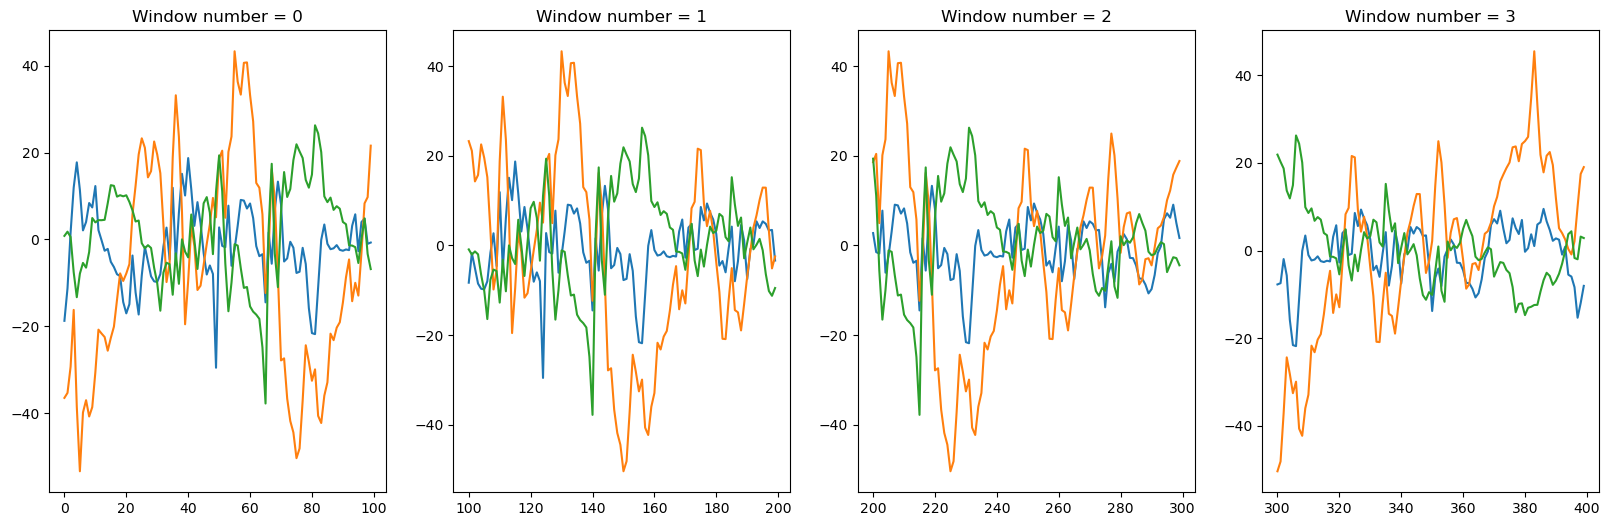

In [29]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

for i in range(4):
    ax[i].plot(first_four_windows[i]['gyro_x'])
    ax[i].plot(first_four_windows[i]['gyro_y'])
    ax[i].plot(first_four_windows[i]['gyro_z'])
    ax[i].set_title(f"Window number = {first_four_windows[i].window_id.values[0]}")


It's also interesting to observe the dimensionality of one window. Considering just the accelerometer and gyroscope signals, with all three axes, the resulting dimensionality of one window is:

In [30]:
columns_of_interest = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [31]:
np.array(first_four_windows[0][columns_of_interest]).shape

(100, 6)

## From sliding windows to datapoints

Each sliding window needs to be further processed in order to represent an appropriate input datapoint. The preprocessing methods might differ depending on which type of model you choose to use. 

You can also do further processing on the signal types and axes, for example smooth the signal, apply axis fusion, eliminate noise etc. 

Here we will discuss simple examples without any preprocessing. 

### Feature extraction with tsfresh

One quick and simple method to consider for HAR is a [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). It can take a multi-dimensional datapoint as input and can output a classification. 

We can transform each window of data into one single, multidimensional datapoint by applying simple computations using the [tsfresh](https://tsfresh.readthedocs.io/en/latest/text/feature_extraction_settings.html) package.

In [32]:
feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    new_features.dropna()
    feature_list.append(new_features)
    
feature_list = pd.concat(feature_list, axis=1)

feature_list

Feature Extraction: 100%|███████████████████████| 15/15 [00:02<00:00,  7.15it/s]


,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__root_mean_square,accel_x__maximum,accel_x__minimum,accel_y__sum_values,...,gyro_y__minimum,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__root_mean_square,gyro_z__maximum,gyro_z__minimum
0,-11.738281,-0.120728,-0.117383,100.0,0.150666,0.022700,0.190995,0.177979,-0.492920,-98.237549,...,-53.359375,137.046875,0.789062,1.370469,100.0,11.044054,121.971139,11.128761,26.265625,-37.765625
1,-8.173096,-0.052490,-0.081731,100.0,0.151127,0.022839,0.171812,0.254883,-0.492920,-97.781494,...,-50.343750,78.484375,0.015625,0.784844,100.0,10.874810,118.261503,10.903095,26.265625,-37.765625
2,-7.534912,-0.067627,-0.075349,100.0,0.131318,0.017244,0.151400,0.254883,-0.449219,-97.058838,...,-50.343750,104.484375,0.640625,1.044844,100.0,10.526716,110.811746,10.578442,26.265625,-37.765625
3,-9.499512,-0.098877,-0.094995,100.0,0.132184,0.017473,0.162778,0.254883,-0.449219,-97.354004,...,-50.343750,44.109375,0.046875,0.441094,100.0,8.571096,73.463681,8.582438,26.265625,-14.718750
4,-11.850342,-0.124023,-0.118503,100.0,0.126285,0.015948,0.173179,0.254883,-0.449219,-97.120605,...,-20.875000,-550.781250,-4.703125,-5.507812,100.0,8.508617,72.396560,10.135707,15.218750,-25.593750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7754,-93.809571,-1.041016,-0.938096,100.0,0.620367,0.384856,1.124668,0.724609,-2.000000,13.854492,...,-208.687500,-1056.125000,-4.468750,-10.561250,100.0,52.499096,2756.155057,53.550864,92.031250,-136.906250
7755,-94.779297,-1.052246,-0.947793,100.0,0.620852,0.385458,1.133035,0.724609,-2.000000,13.886719,...,-208.687500,-1039.656250,-12.343750,-10.396562,100.0,52.995020,2808.472162,54.005191,135.250000,-136.906250
7756,-95.936524,-1.060547,-0.959365,100.0,0.601359,0.361633,1.132261,0.181641,-2.000000,13.807617,...,-208.687500,-882.375000,-10.421875,-8.823750,100.0,53.098751,2819.477354,53.826907,135.250000,-136.906250
7757,-94.777344,-1.058105,-0.947773,100.0,0.598579,0.358297,1.120969,0.324219,-2.000000,14.304688,...,-206.375000,-842.750000,-3.250000,-8.427500,100.0,52.716092,2778.986326,53.385476,135.250000,-136.906250


Now the index represents the window ID, and each row in the DataFrame represents a multi-dimensional datapoint which we can use as input to the RFC.

You can use the window ID to refer back to the initial dataframe and get the class (activity type) for each window.

We will now process both recordings so that we have two classes for our classifier. For your own work you should only aim to perform classification on data from one sensor. 

In [33]:
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

all_overlapping_windows = []

for rid, group in base_df[base_df["sensor_type"].str.contains("Respeck")].groupby("sensor_type"):
    print(f"Processing rid = {rid}")
    
    large_enough_windows = [window for window in group.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]
    
    overlapping_windows = large_enough_windows[::step_size] 
    
    # then we will append a window ID to each window
    for window in overlapping_windows:
        window.loc[:, 'window_id'] = window_number
        window_number += 1
    
    
    all_overlapping_windows.append(pd.concat(overlapping_windows).reset_index(drop=True))

Processing rid = Respeck


In [34]:
final_sliding_windows = pd.concat(all_overlapping_windows).reset_index(drop=True)

In [35]:
# now extract all features
feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    new_features.dropna()
    feature_list.append(new_features)
feature_list = pd.concat(feature_list, axis=1)

feature_list

Feature Extraction: 100%|███████████████████████| 15/15 [00:05<00:00,  2.71it/s]


,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__root_mean_square,accel_x__maximum,accel_x__minimum,accel_y__sum_values,...,gyro_y__minimum,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__root_mean_square,gyro_z__maximum,gyro_z__minimum
0,-4.828125,-0.089722,-0.096562,50.0,0.150764,0.022730,0.179037,0.384521,-0.384521,-50.809448,...,-36.953125,28.609375,1.281250,0.572187,50.0,8.961102,80.301347,8.979351,22.781250,-17.718750
1,-3.955566,-0.075806,-0.079111,50.0,0.140144,0.019640,0.160931,0.314697,-0.384521,-50.121460,...,-34.390625,29.812500,1.140625,0.596250,50.0,7.138742,50.961634,7.163599,14.531250,-17.718750
2,-4.352051,-0.085327,-0.087041,50.0,0.129597,0.016795,0.156114,0.182129,-0.384277,-50.233764,...,-34.390625,53.859375,0.890625,1.077187,50.0,8.088262,65.419975,8.159676,16.421875,-20.640625
3,-6.350342,-0.135254,-0.127007,50.0,0.135328,0.018314,0.185592,0.169922,-0.395752,-49.140747,...,-25.796875,-47.562500,-1.523438,-0.951250,50.0,8.270932,68.408317,8.325455,16.421875,-20.640625
4,-7.920440,-0.185181,-0.158409,50.0,0.139309,0.019407,0.210951,0.204346,-0.395752,-49.776096,...,-16.734375,-151.266631,-4.109375,-3.025333,50.0,8.991419,80.845622,9.486741,18.140625,-22.109375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52717,3.085205,0.032837,0.061704,50.0,0.267966,0.071806,0.274978,0.803711,-0.387451,-48.929321,...,-30.046875,21.781250,-0.554688,0.435625,50.0,10.366488,107.464069,10.375637,20.531250,-22.656250
52718,2.966553,0.042114,0.059331,50.0,0.275162,0.075714,0.281486,0.981934,-0.387451,-48.712768,...,-31.906250,31.375000,-0.031250,0.627500,50.0,10.583952,112.020043,10.602537,20.531250,-22.656250
52719,2.886719,0.019531,0.057734,50.0,0.267431,0.071519,0.273592,0.981934,-0.376953,-49.019897,...,-31.906250,20.156250,0.781250,0.403125,50.0,9.980713,99.614629,9.988851,24.218750,-17.390625
52720,2.526367,0.031494,0.050527,50.0,0.265994,0.070753,0.270751,0.930664,-0.430664,-49.726440,...,-29.375000,12.750000,-0.164062,0.255000,50.0,9.429259,88.910932,9.432707,24.218750,-18.500000


Now we also extract the classes from each window

In [36]:
final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min)

,activity_type
window_id,
0,Climbing stairs
1,Climbing stairs
2,Climbing stairs
3,Climbing stairs
4,Climbing stairs
...,...
52717,Walking at normal speed
52718,Walking at normal speed
52719,Walking at normal speed


We need to assign a number to each categorical class for the Random Forest Classifer. It is mainly up to you how you categorise your classes. In this example, we will use the labels:
- 0 for Desk work
- 1 for Walking at normal speed

Bear in mind that your classification task will be multi-class, not binary. 

In [37]:
class_labels = {
    'Desk work': 0,
    'Walking at normal speed': 1,
    'Climbing stairs': 2,
    'Descending stairs': 3,
    'Lying down left': 4,
    'Lying down right': 5,
    'Lying down on back': 6,
    'Lying down on stomach': 7,
    'Movement': 8,
    'Running': 9,
    'Sitting': 10,
    'Sitting bent backward': 11,
    'Sitting bent forward': 12,
    'Standing': 13
    
    
}

In [38]:
window_id_class_labels = final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)
window_id_class_labels

,activity_type
window_id,
0,2
1,2
2,2
3,2
4,2
...,...
52717,1
52718,1
52719,1


In [39]:
base_df["recording_id"].unique()

array([nan, 'Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43',
       'Respeck_s1541031_Descending stairs_06-10-2021_11-25-05', ...,
       'Thingy_s2342658_Sitting bent forward_04-10-2022_14-18-28',
       'Thingy_s2342658_Standing_04-10-2022_14-22-37',
       'Thingy_s2342658_Walking at normal speed_04-10-2022_14-53-43'],
      dtype=object)

### Quickly training a Random Forest Classifier

We now have all the tools to start training a Random Forest Classifier. We will use the feature_list as inputs and window_id_class_labels as outputs. We will do a basic 80/20 split of the data for demonstration purposes. 

In your project you should split the data into training and tests sets by excluding entire subjects from the training set. This is discussed later on in this notebook.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(feature_list, window_id_class_labels,
                                                    test_size=0.2, train_size=0.8)

In [41]:
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set: X_train = (42177, 54), y_train = (42177, 1)
Test set: X_test = (10545, 54), y_test = (10545, 1)


Now we can build and train the random forest classifier

In [42]:
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

/afs/inf.ed.ac.uk/user/s19/s1962038/miniconda3/envs/pdiot/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       762
           1       0.82      0.92      0.87       772
           2       0.84      0.80      0.82       825
           3       0.85      0.88      0.87       777
           4       0.98      0.98      0.98       692
           5       0.99      0.97      0.98       705
           6       0.98      0.99      0.99       776
           7       0.99      0.99      0.99       759
           8       0.86      0.80      0.83       766
           9       0.94      0.97      0.96       763
          10       0.93      0.92      0.93       760
          11       0.96      0.97      0.96       736
          12       0.98      0.97      0.98       717
          13       0.94      0.86      0.90       735

    accuracy                           0.92     10545
   macro avg       0.93      0.93      0.93     10545
weighted avg       0.92      0.92      0.92     10545



This is a very easy problem so the classifier learns very quickly. Your actual problem of classifying multiple activities will be much harder.

## Leave-one-subject-out cross-validation

One of the other reason our previous classifier functions so well is that each person performs activities in a very consistent manner. If a subject's data is both in the training set and the test set, it provides the model with an unfair advantage. Moreover, the results that your model will output will be falsely high. When you test your model on a completely new, unseen subject, your accuracy will drop considerably. 

This is why when training a HAR model you will want to do a special kind of cross-validation: Leave-One-Subject-Out (LOSOXV), where we leave one (or more) subject(s) in the testing set at each iteration.

![losoxv](../Images/LOOCV.png "losoxv")

This ensures that the results we get from our classifier are consistent to what we would get in real life, if we were to test the model on a new user.

## Training a simple CNN

There are some different preprocessing techniques you can apply when the resulting "datapoint" is an input to a convolutional neural network. 

You can use two types of convolutional layers:
* 1D Conv Layers - which will work on 1D data, for example a single axis from one single sensor (accel, gyro or mag)
* 2D Conv Layers - suitable if the input data is in the form of an image, for example

We will be demonstrating how to build a simple 1D CNN using 6 channels: the 3 axes of the accelerometer and the 3 axes of the gyroscope.

### Setting up the model

In [44]:
filters = 64
kernel_size = 3
n_features = 6
activation='relu'
n_classes = 14

In [45]:
from keras.utils.vis_utils import plot_model
model = Sequential()

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear', 
                 input_shape=(window_size, n_features)))
model.add(BatchNormalization())
model.add(Activation(activation))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Activation(activation))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Activation(activation))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()
plot_model(model, show_shapes=True, show_layer_names = True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 64)            1216      
                                                                 
 batch_normalization (BatchN  (None, 48, 64)           256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 64)            12352     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 64)           256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 46, 64)            0

2022-10-30 16:48:33.458990: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-30 16:48:33.460170: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### Re-generating the data in the appropriate format

We need to do a bit more work with our data to bring it into a format fit for training a CNN. 

A CNN will take multi-dimensional arrays as input. We have already specified that the input shape is (window_size, n_features), i.e. (50, 6). 

Remember that we generated sliding windows before. Now we just need to take the raw values from each window and create a training set. 

In [46]:
columns_of_interest

['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [47]:
X = []
y = []

for window_id, group in final_sliding_windows.groupby('window_id'):
    print(f"window_id = {window_id}")
    
    shape = group[columns_of_interest].values.shape
    print(f"shape = {shape}")
    
    X.append(group[columns_of_interest].values)
    y.append(class_labels[group["activity_type"].values[0]])

window_id = 0
shape = (50, 6)
window_id = 1
shape = (50, 6)
window_id = 2
shape = (50, 6)
window_id = 3
shape = (50, 6)
window_id = 4
shape = (50, 6)
window_id = 5
shape = (50, 6)
window_id = 6
shape = (50, 6)
window_id = 7
shape = (50, 6)
window_id = 8
shape = (50, 6)
window_id = 9
shape = (50, 6)
window_id = 10
shape = (50, 6)
window_id = 11
shape = (50, 6)
window_id = 12
shape = (50, 6)
window_id = 13
shape = (50, 6)
window_id = 14
shape = (50, 6)
window_id = 15
shape = (50, 6)
window_id = 16
shape = (50, 6)
window_id = 17
shape = (50, 6)
window_id = 18
shape = (50, 6)
window_id = 19
shape = (50, 6)
window_id = 20
shape = (50, 6)
window_id = 21
shape = (50, 6)
window_id = 22
shape = (50, 6)
window_id = 23
shape = (50, 6)
window_id = 24
shape = (50, 6)
window_id = 25
shape = (50, 6)
window_id = 26
shape = (50, 6)
window_id = 27
shape = (50, 6)
window_id = 28
shape = (50, 6)
window_id = 29
shape = (50, 6)
window_id = 30
shape = (50, 6)
window_id = 31
shape = (50, 6)
window_id = 32
sha

shape = (50, 6)
window_id = 415
shape = (50, 6)
window_id = 416
shape = (50, 6)
window_id = 417
shape = (50, 6)
window_id = 418
shape = (50, 6)
window_id = 419
shape = (50, 6)
window_id = 420
shape = (50, 6)
window_id = 421
shape = (50, 6)
window_id = 422
shape = (50, 6)
window_id = 423
shape = (50, 6)
window_id = 424
shape = (50, 6)
window_id = 425
shape = (50, 6)
window_id = 426
shape = (50, 6)
window_id = 427
shape = (50, 6)
window_id = 428
shape = (50, 6)
window_id = 429
shape = (50, 6)
window_id = 430
shape = (50, 6)
window_id = 431
shape = (50, 6)
window_id = 432
shape = (50, 6)
window_id = 433
shape = (50, 6)
window_id = 434
shape = (50, 6)
window_id = 435
shape = (50, 6)
window_id = 436
shape = (50, 6)
window_id = 437
shape = (50, 6)
window_id = 438
shape = (50, 6)
window_id = 439
shape = (50, 6)
window_id = 440
shape = (50, 6)
window_id = 441
shape = (50, 6)
window_id = 442
shape = (50, 6)
window_id = 443
shape = (50, 6)
window_id = 444
shape = (50, 6)
window_id = 445
shape = 

shape = (50, 6)
window_id = 1459
shape = (50, 6)
window_id = 1460
shape = (50, 6)
window_id = 1461
shape = (50, 6)
window_id = 1462
shape = (50, 6)
window_id = 1463
shape = (50, 6)
window_id = 1464
shape = (50, 6)
window_id = 1465
shape = (50, 6)
window_id = 1466
shape = (50, 6)
window_id = 1467
shape = (50, 6)
window_id = 1468
shape = (50, 6)
window_id = 1469
shape = (50, 6)
window_id = 1470
shape = (50, 6)
window_id = 1471
shape = (50, 6)
window_id = 1472
shape = (50, 6)
window_id = 1473
shape = (50, 6)
window_id = 1474
shape = (50, 6)
window_id = 1475
shape = (50, 6)
window_id = 1476
shape = (50, 6)
window_id = 1477
shape = (50, 6)
window_id = 1478
shape = (50, 6)
window_id = 1479
shape = (50, 6)
window_id = 1480
shape = (50, 6)
window_id = 1481
shape = (50, 6)
window_id = 1482
shape = (50, 6)
window_id = 1483
shape = (50, 6)
window_id = 1484
shape = (50, 6)
window_id = 1485
shape = (50, 6)
window_id = 1486
shape = (50, 6)
window_id = 1487
shape = (50, 6)
window_id = 1488
shape = (5

shape = (50, 6)
window_id = 2634
shape = (50, 6)
window_id = 2635
shape = (50, 6)
window_id = 2636
shape = (50, 6)
window_id = 2637
shape = (50, 6)
window_id = 2638
shape = (50, 6)
window_id = 2639
shape = (50, 6)
window_id = 2640
shape = (50, 6)
window_id = 2641
shape = (50, 6)
window_id = 2642
shape = (50, 6)
window_id = 2643
shape = (50, 6)
window_id = 2644
shape = (50, 6)
window_id = 2645
shape = (50, 6)
window_id = 2646
shape = (50, 6)
window_id = 2647
shape = (50, 6)
window_id = 2648
shape = (50, 6)
window_id = 2649
shape = (50, 6)
window_id = 2650
shape = (50, 6)
window_id = 2651
shape = (50, 6)
window_id = 2652
shape = (50, 6)
window_id = 2653
shape = (50, 6)
window_id = 2654
shape = (50, 6)
window_id = 2655
shape = (50, 6)
window_id = 2656
shape = (50, 6)
window_id = 2657
shape = (50, 6)
window_id = 2658
shape = (50, 6)
window_id = 2659
shape = (50, 6)
window_id = 2660
shape = (50, 6)
window_id = 2661
shape = (50, 6)
window_id = 2662
shape = (50, 6)
window_id = 2663
shape = (5

shape = (50, 6)
window_id = 3061
shape = (50, 6)
window_id = 3062
shape = (50, 6)
window_id = 3063
shape = (50, 6)
window_id = 3064
shape = (50, 6)
window_id = 3065
shape = (50, 6)
window_id = 3066
shape = (50, 6)
window_id = 3067
shape = (50, 6)
window_id = 3068
shape = (50, 6)
window_id = 3069
shape = (50, 6)
window_id = 3070
shape = (50, 6)
window_id = 3071
shape = (50, 6)
window_id = 3072
shape = (50, 6)
window_id = 3073
shape = (50, 6)
window_id = 3074
shape = (50, 6)
window_id = 3075
shape = (50, 6)
window_id = 3076
shape = (50, 6)
window_id = 3077
shape = (50, 6)
window_id = 3078
shape = (50, 6)
window_id = 3079
shape = (50, 6)
window_id = 3080
shape = (50, 6)
window_id = 3081
shape = (50, 6)
window_id = 3082
shape = (50, 6)
window_id = 3083
shape = (50, 6)
window_id = 3084
shape = (50, 6)
window_id = 3085
shape = (50, 6)
window_id = 3086
shape = (50, 6)
window_id = 3087
shape = (50, 6)
window_id = 3088
shape = (50, 6)
window_id = 3089
shape = (50, 6)
window_id = 3090
shape = (5

shape = (50, 6)
window_id = 3473
shape = (50, 6)
window_id = 3474
shape = (50, 6)
window_id = 3475
shape = (50, 6)
window_id = 3476
shape = (50, 6)
window_id = 3477
shape = (50, 6)
window_id = 3478
shape = (50, 6)
window_id = 3479
shape = (50, 6)
window_id = 3480
shape = (50, 6)
window_id = 3481
shape = (50, 6)
window_id = 3482
shape = (50, 6)
window_id = 3483
shape = (50, 6)
window_id = 3484
shape = (50, 6)
window_id = 3485
shape = (50, 6)
window_id = 3486
shape = (50, 6)
window_id = 3487
shape = (50, 6)
window_id = 3488
shape = (50, 6)
window_id = 3489
shape = (50, 6)
window_id = 3490
shape = (50, 6)
window_id = 3491
shape = (50, 6)
window_id = 3492
shape = (50, 6)
window_id = 3493
shape = (50, 6)
window_id = 3494
shape = (50, 6)
window_id = 3495
shape = (50, 6)
window_id = 3496
shape = (50, 6)
window_id = 3497
shape = (50, 6)
window_id = 3498
shape = (50, 6)
window_id = 3499
shape = (50, 6)
window_id = 3500
shape = (50, 6)
window_id = 3501
shape = (50, 6)
window_id = 3502
shape = (5

shape = (50, 6)
window_id = 4618
shape = (50, 6)
window_id = 4619
shape = (50, 6)
window_id = 4620
shape = (50, 6)
window_id = 4621
shape = (50, 6)
window_id = 4622
shape = (50, 6)
window_id = 4623
shape = (50, 6)
window_id = 4624
shape = (50, 6)
window_id = 4625
shape = (50, 6)
window_id = 4626
shape = (50, 6)
window_id = 4627
shape = (50, 6)
window_id = 4628
shape = (50, 6)
window_id = 4629
shape = (50, 6)
window_id = 4630
shape = (50, 6)
window_id = 4631
shape = (50, 6)
window_id = 4632
shape = (50, 6)
window_id = 4633
shape = (50, 6)
window_id = 4634
shape = (50, 6)
window_id = 4635
shape = (50, 6)
window_id = 4636
shape = (50, 6)
window_id = 4637
shape = (50, 6)
window_id = 4638
shape = (50, 6)
window_id = 4639
shape = (50, 6)
window_id = 4640
shape = (50, 6)
window_id = 4641
shape = (50, 6)
window_id = 4642
shape = (50, 6)
window_id = 4643
shape = (50, 6)
window_id = 4644
shape = (50, 6)
window_id = 4645
shape = (50, 6)
window_id = 4646
shape = (50, 6)
window_id = 4647
shape = (5

shape = (50, 6)
window_id = 5495
shape = (50, 6)
window_id = 5496
shape = (50, 6)
window_id = 5497
shape = (50, 6)
window_id = 5498
shape = (50, 6)
window_id = 5499
shape = (50, 6)
window_id = 5500
shape = (50, 6)
window_id = 5501
shape = (50, 6)
window_id = 5502
shape = (50, 6)
window_id = 5503
shape = (50, 6)
window_id = 5504
shape = (50, 6)
window_id = 5505
shape = (50, 6)
window_id = 5506
shape = (50, 6)
window_id = 5507
shape = (50, 6)
window_id = 5508
shape = (50, 6)
window_id = 5509
shape = (50, 6)
window_id = 5510
shape = (50, 6)
window_id = 5511
shape = (50, 6)
window_id = 5512
shape = (50, 6)
window_id = 5513
shape = (50, 6)
window_id = 5514
shape = (50, 6)
window_id = 5515
shape = (50, 6)
window_id = 5516
shape = (50, 6)
window_id = 5517
shape = (50, 6)
window_id = 5518
shape = (50, 6)
window_id = 5519
shape = (50, 6)
window_id = 5520
shape = (50, 6)
window_id = 5521
shape = (50, 6)
window_id = 5522
shape = (50, 6)
window_id = 5523
shape = (50, 6)
window_id = 5524
shape = (5

shape = (50, 6)
window_id = 6542
shape = (50, 6)
window_id = 6543
shape = (50, 6)
window_id = 6544
shape = (50, 6)
window_id = 6545
shape = (50, 6)
window_id = 6546
shape = (50, 6)
window_id = 6547
shape = (50, 6)
window_id = 6548
shape = (50, 6)
window_id = 6549
shape = (50, 6)
window_id = 6550
shape = (50, 6)
window_id = 6551
shape = (50, 6)
window_id = 6552
shape = (50, 6)
window_id = 6553
shape = (50, 6)
window_id = 6554
shape = (50, 6)
window_id = 6555
shape = (50, 6)
window_id = 6556
shape = (50, 6)
window_id = 6557
shape = (50, 6)
window_id = 6558
shape = (50, 6)
window_id = 6559
shape = (50, 6)
window_id = 6560
shape = (50, 6)
window_id = 6561
shape = (50, 6)
window_id = 6562
shape = (50, 6)
window_id = 6563
shape = (50, 6)
window_id = 6564
shape = (50, 6)
window_id = 6565
shape = (50, 6)
window_id = 6566
shape = (50, 6)
window_id = 6567
shape = (50, 6)
window_id = 6568
shape = (50, 6)
window_id = 6569
shape = (50, 6)
window_id = 6570
shape = (50, 6)
window_id = 6571
shape = (5

shape = (50, 6)
window_id = 8853
shape = (50, 6)
window_id = 8854
shape = (50, 6)
window_id = 8855
shape = (50, 6)
window_id = 8856
shape = (50, 6)
window_id = 8857
shape = (50, 6)
window_id = 8858
shape = (50, 6)
window_id = 8859
shape = (50, 6)
window_id = 8860
shape = (50, 6)
window_id = 8861
shape = (50, 6)
window_id = 8862
shape = (50, 6)
window_id = 8863
shape = (50, 6)
window_id = 8864
shape = (50, 6)
window_id = 8865
shape = (50, 6)
window_id = 8866
shape = (50, 6)
window_id = 8867
shape = (50, 6)
window_id = 8868
shape = (50, 6)
window_id = 8869
shape = (50, 6)
window_id = 8870
shape = (50, 6)
window_id = 8871
shape = (50, 6)
window_id = 8872
shape = (50, 6)
window_id = 8873
shape = (50, 6)
window_id = 8874
shape = (50, 6)
window_id = 8875
shape = (50, 6)
window_id = 8876
shape = (50, 6)
window_id = 8877
shape = (50, 6)
window_id = 8878
shape = (50, 6)
window_id = 8879
shape = (50, 6)
window_id = 8880
shape = (50, 6)
window_id = 8881
shape = (50, 6)
window_id = 8882
shape = (5

shape = (50, 6)
window_id = 9837
shape = (50, 6)
window_id = 9838
shape = (50, 6)
window_id = 9839
shape = (50, 6)
window_id = 9840
shape = (50, 6)
window_id = 9841
shape = (50, 6)
window_id = 9842
shape = (50, 6)
window_id = 9843
shape = (50, 6)
window_id = 9844
shape = (50, 6)
window_id = 9845
shape = (50, 6)
window_id = 9846
shape = (50, 6)
window_id = 9847
shape = (50, 6)
window_id = 9848
shape = (50, 6)
window_id = 9849
shape = (50, 6)
window_id = 9850
shape = (50, 6)
window_id = 9851
shape = (50, 6)
window_id = 9852
shape = (50, 6)
window_id = 9853
shape = (50, 6)
window_id = 9854
shape = (50, 6)
window_id = 9855
shape = (50, 6)
window_id = 9856
shape = (50, 6)
window_id = 9857
shape = (50, 6)
window_id = 9858
shape = (50, 6)
window_id = 9859
shape = (50, 6)
window_id = 9860
shape = (50, 6)
window_id = 9861
shape = (50, 6)
window_id = 9862
shape = (50, 6)
window_id = 9863
shape = (50, 6)
window_id = 9864
shape = (50, 6)
window_id = 9865
shape = (50, 6)
window_id = 9866
shape = (5

shape = (50, 6)
window_id = 10249
shape = (50, 6)
window_id = 10250
shape = (50, 6)
window_id = 10251
shape = (50, 6)
window_id = 10252
shape = (50, 6)
window_id = 10253
shape = (50, 6)
window_id = 10254
shape = (50, 6)
window_id = 10255
shape = (50, 6)
window_id = 10256
shape = (50, 6)
window_id = 10257
shape = (50, 6)
window_id = 10258
shape = (50, 6)
window_id = 10259
shape = (50, 6)
window_id = 10260
shape = (50, 6)
window_id = 10261
shape = (50, 6)
window_id = 10262
shape = (50, 6)
window_id = 10263
shape = (50, 6)
window_id = 10264
shape = (50, 6)
window_id = 10265
shape = (50, 6)
window_id = 10266
shape = (50, 6)
window_id = 10267
shape = (50, 6)
window_id = 10268
shape = (50, 6)
window_id = 10269
shape = (50, 6)
window_id = 10270
shape = (50, 6)
window_id = 10271
shape = (50, 6)
window_id = 10272
shape = (50, 6)
window_id = 10273
shape = (50, 6)
window_id = 10274
shape = (50, 6)
window_id = 10275
shape = (50, 6)
window_id = 10276
shape = (50, 6)
window_id = 10277
shape = (50, 6

shape = (50, 6)
window_id = 10806
shape = (50, 6)
window_id = 10807
shape = (50, 6)
window_id = 10808
shape = (50, 6)
window_id = 10809
shape = (50, 6)
window_id = 10810
shape = (50, 6)
window_id = 10811
shape = (50, 6)
window_id = 10812
shape = (50, 6)
window_id = 10813
shape = (50, 6)
window_id = 10814
shape = (50, 6)
window_id = 10815
shape = (50, 6)
window_id = 10816
shape = (50, 6)
window_id = 10817
shape = (50, 6)
window_id = 10818
shape = (50, 6)
window_id = 10819
shape = (50, 6)
window_id = 10820
shape = (50, 6)
window_id = 10821
shape = (50, 6)
window_id = 10822
shape = (50, 6)
window_id = 10823
shape = (50, 6)
window_id = 10824
shape = (50, 6)
window_id = 10825
shape = (50, 6)
window_id = 10826
shape = (50, 6)
window_id = 10827
shape = (50, 6)
window_id = 10828
shape = (50, 6)
window_id = 10829
shape = (50, 6)
window_id = 10830
shape = (50, 6)
window_id = 10831
shape = (50, 6)
window_id = 10832
shape = (50, 6)
window_id = 10833
shape = (50, 6)
window_id = 10834
shape = (50, 6

shape = (50, 6)
window_id = 11418
shape = (50, 6)
window_id = 11419
shape = (50, 6)
window_id = 11420
shape = (50, 6)
window_id = 11421
shape = (50, 6)
window_id = 11422
shape = (50, 6)
window_id = 11423
shape = (50, 6)
window_id = 11424
shape = (50, 6)
window_id = 11425
shape = (50, 6)
window_id = 11426
shape = (50, 6)
window_id = 11427
shape = (50, 6)
window_id = 11428
shape = (50, 6)
window_id = 11429
shape = (50, 6)
window_id = 11430
shape = (50, 6)
window_id = 11431
shape = (50, 6)
window_id = 11432
shape = (50, 6)
window_id = 11433
shape = (50, 6)
window_id = 11434
shape = (50, 6)
window_id = 11435
shape = (50, 6)
window_id = 11436
shape = (50, 6)
window_id = 11437
shape = (50, 6)
window_id = 11438
shape = (50, 6)
window_id = 11439
shape = (50, 6)
window_id = 11440
shape = (50, 6)
window_id = 11441
shape = (50, 6)
window_id = 11442
shape = (50, 6)
window_id = 11443
shape = (50, 6)
window_id = 11444
shape = (50, 6)
window_id = 11445
shape = (50, 6)
window_id = 11446
shape = (50, 6

shape = (50, 6)
window_id = 12213
shape = (50, 6)
window_id = 12214
shape = (50, 6)
window_id = 12215
shape = (50, 6)
window_id = 12216
shape = (50, 6)
window_id = 12217
shape = (50, 6)
window_id = 12218
shape = (50, 6)
window_id = 12219
shape = (50, 6)
window_id = 12220
shape = (50, 6)
window_id = 12221
shape = (50, 6)
window_id = 12222
shape = (50, 6)
window_id = 12223
shape = (50, 6)
window_id = 12224
shape = (50, 6)
window_id = 12225
shape = (50, 6)
window_id = 12226
shape = (50, 6)
window_id = 12227
shape = (50, 6)
window_id = 12228
shape = (50, 6)
window_id = 12229
shape = (50, 6)
window_id = 12230
shape = (50, 6)
window_id = 12231
shape = (50, 6)
window_id = 12232
shape = (50, 6)
window_id = 12233
shape = (50, 6)
window_id = 12234
shape = (50, 6)
window_id = 12235
shape = (50, 6)
window_id = 12236
shape = (50, 6)
window_id = 12237
shape = (50, 6)
window_id = 12238
shape = (50, 6)
window_id = 12239
shape = (50, 6)
window_id = 12240
shape = (50, 6)
window_id = 12241
shape = (50, 6

shape = (50, 6)
window_id = 12534
shape = (50, 6)
window_id = 12535
shape = (50, 6)
window_id = 12536
shape = (50, 6)
window_id = 12537
shape = (50, 6)
window_id = 12538
shape = (50, 6)
window_id = 12539
shape = (50, 6)
window_id = 12540
shape = (50, 6)
window_id = 12541
shape = (50, 6)
window_id = 12542
shape = (50, 6)
window_id = 12543
shape = (50, 6)
window_id = 12544
shape = (50, 6)
window_id = 12545
shape = (50, 6)
window_id = 12546
shape = (50, 6)
window_id = 12547
shape = (50, 6)
window_id = 12548
shape = (50, 6)
window_id = 12549
shape = (50, 6)
window_id = 12550
shape = (50, 6)
window_id = 12551
shape = (50, 6)
window_id = 12552
shape = (50, 6)
window_id = 12553
shape = (50, 6)
window_id = 12554
shape = (50, 6)
window_id = 12555
shape = (50, 6)
window_id = 12556
shape = (50, 6)
window_id = 12557
shape = (50, 6)
window_id = 12558
shape = (50, 6)
window_id = 12559
shape = (50, 6)
window_id = 12560
shape = (50, 6)
window_id = 12561
shape = (50, 6)
window_id = 12562
shape = (50, 6

shape = (50, 6)
window_id = 12965
shape = (50, 6)
window_id = 12966
shape = (50, 6)
window_id = 12967
shape = (50, 6)
window_id = 12968
shape = (50, 6)
window_id = 12969
shape = (50, 6)
window_id = 12970
shape = (50, 6)
window_id = 12971
shape = (50, 6)
window_id = 12972
shape = (50, 6)
window_id = 12973
shape = (50, 6)
window_id = 12974
shape = (50, 6)
window_id = 12975
shape = (50, 6)
window_id = 12976
shape = (50, 6)
window_id = 12977
shape = (50, 6)
window_id = 12978
shape = (50, 6)
window_id = 12979
shape = (50, 6)
window_id = 12980
shape = (50, 6)
window_id = 12981
shape = (50, 6)
window_id = 12982
shape = (50, 6)
window_id = 12983
shape = (50, 6)
window_id = 12984
shape = (50, 6)
window_id = 12985
shape = (50, 6)
window_id = 12986
shape = (50, 6)
window_id = 12987
shape = (50, 6)
window_id = 12988
shape = (50, 6)
window_id = 12989
shape = (50, 6)
window_id = 12990
shape = (50, 6)
window_id = 12991
shape = (50, 6)
window_id = 12992
shape = (50, 6)
window_id = 12993
shape = (50, 6

shape = (50, 6)
window_id = 13720
shape = (50, 6)
window_id = 13721
shape = (50, 6)
window_id = 13722
shape = (50, 6)
window_id = 13723
shape = (50, 6)
window_id = 13724
shape = (50, 6)
window_id = 13725
shape = (50, 6)
window_id = 13726
shape = (50, 6)
window_id = 13727
shape = (50, 6)
window_id = 13728
shape = (50, 6)
window_id = 13729
shape = (50, 6)
window_id = 13730
shape = (50, 6)
window_id = 13731
shape = (50, 6)
window_id = 13732
shape = (50, 6)
window_id = 13733
shape = (50, 6)
window_id = 13734
shape = (50, 6)
window_id = 13735
shape = (50, 6)
window_id = 13736
shape = (50, 6)
window_id = 13737
shape = (50, 6)
window_id = 13738
shape = (50, 6)
window_id = 13739
shape = (50, 6)
window_id = 13740
shape = (50, 6)
window_id = 13741
shape = (50, 6)
window_id = 13742
shape = (50, 6)
window_id = 13743
shape = (50, 6)
window_id = 13744
shape = (50, 6)
window_id = 13745
shape = (50, 6)
window_id = 13746
shape = (50, 6)
window_id = 13747
shape = (50, 6)
window_id = 13748
shape = (50, 6

shape = (50, 6)
window_id = 14167
shape = (50, 6)
window_id = 14168
shape = (50, 6)
window_id = 14169
shape = (50, 6)
window_id = 14170
shape = (50, 6)
window_id = 14171
shape = (50, 6)
window_id = 14172
shape = (50, 6)
window_id = 14173
shape = (50, 6)
window_id = 14174
shape = (50, 6)
window_id = 14175
shape = (50, 6)
window_id = 14176
shape = (50, 6)
window_id = 14177
shape = (50, 6)
window_id = 14178
shape = (50, 6)
window_id = 14179
shape = (50, 6)
window_id = 14180
shape = (50, 6)
window_id = 14181
shape = (50, 6)
window_id = 14182
shape = (50, 6)
window_id = 14183
shape = (50, 6)
window_id = 14184
shape = (50, 6)
window_id = 14185
shape = (50, 6)
window_id = 14186
shape = (50, 6)
window_id = 14187
shape = (50, 6)
window_id = 14188
shape = (50, 6)
window_id = 14189
shape = (50, 6)
window_id = 14190
shape = (50, 6)
window_id = 14191
shape = (50, 6)
window_id = 14192
shape = (50, 6)
window_id = 14193
shape = (50, 6)
window_id = 14194
shape = (50, 6)
window_id = 14195
shape = (50, 6

shape = (50, 6)
window_id = 14779
shape = (50, 6)
window_id = 14780
shape = (50, 6)
window_id = 14781
shape = (50, 6)
window_id = 14782
shape = (50, 6)
window_id = 14783
shape = (50, 6)
window_id = 14784
shape = (50, 6)
window_id = 14785
shape = (50, 6)
window_id = 14786
shape = (50, 6)
window_id = 14787
shape = (50, 6)
window_id = 14788
shape = (50, 6)
window_id = 14789
shape = (50, 6)
window_id = 14790
shape = (50, 6)
window_id = 14791
shape = (50, 6)
window_id = 14792
shape = (50, 6)
window_id = 14793
shape = (50, 6)
window_id = 14794
shape = (50, 6)
window_id = 14795
shape = (50, 6)
window_id = 14796
shape = (50, 6)
window_id = 14797
shape = (50, 6)
window_id = 14798
shape = (50, 6)
window_id = 14799
shape = (50, 6)
window_id = 14800
shape = (50, 6)
window_id = 14801
shape = (50, 6)
window_id = 14802
shape = (50, 6)
window_id = 14803
shape = (50, 6)
window_id = 14804
shape = (50, 6)
window_id = 14805
shape = (50, 6)
window_id = 14806
shape = (50, 6)
window_id = 14807
shape = (50, 6

shape = (50, 6)
window_id = 15419
shape = (50, 6)
window_id = 15420
shape = (50, 6)
window_id = 15421
shape = (50, 6)
window_id = 15422
shape = (50, 6)
window_id = 15423
shape = (50, 6)
window_id = 15424
shape = (50, 6)
window_id = 15425
shape = (50, 6)
window_id = 15426
shape = (50, 6)
window_id = 15427
shape = (50, 6)
window_id = 15428
shape = (50, 6)
window_id = 15429
shape = (50, 6)
window_id = 15430
shape = (50, 6)
window_id = 15431
shape = (50, 6)
window_id = 15432
shape = (50, 6)
window_id = 15433
shape = (50, 6)
window_id = 15434
shape = (50, 6)
window_id = 15435
shape = (50, 6)
window_id = 15436
shape = (50, 6)
window_id = 15437
shape = (50, 6)
window_id = 15438
shape = (50, 6)
window_id = 15439
shape = (50, 6)
window_id = 15440
shape = (50, 6)
window_id = 15441
shape = (50, 6)
window_id = 15442
shape = (50, 6)
window_id = 15443
shape = (50, 6)
window_id = 15444
shape = (50, 6)
window_id = 15445
shape = (50, 6)
window_id = 15446
shape = (50, 6)
window_id = 15447
shape = (50, 6

shape = (50, 6)
window_id = 15923
shape = (50, 6)
window_id = 15924
shape = (50, 6)
window_id = 15925
shape = (50, 6)
window_id = 15926
shape = (50, 6)
window_id = 15927
shape = (50, 6)
window_id = 15928
shape = (50, 6)
window_id = 15929
shape = (50, 6)
window_id = 15930
shape = (50, 6)
window_id = 15931
shape = (50, 6)
window_id = 15932
shape = (50, 6)
window_id = 15933
shape = (50, 6)
window_id = 15934
shape = (50, 6)
window_id = 15935
shape = (50, 6)
window_id = 15936
shape = (50, 6)
window_id = 15937
shape = (50, 6)
window_id = 15938
shape = (50, 6)
window_id = 15939
shape = (50, 6)
window_id = 15940
shape = (50, 6)
window_id = 15941
shape = (50, 6)
window_id = 15942
shape = (50, 6)
window_id = 15943
shape = (50, 6)
window_id = 15944
shape = (50, 6)
window_id = 15945
shape = (50, 6)
window_id = 15946
shape = (50, 6)
window_id = 15947
shape = (50, 6)
window_id = 15948
shape = (50, 6)
window_id = 15949
shape = (50, 6)
window_id = 15950
shape = (50, 6)
window_id = 15951
shape = (50, 6

shape = (50, 6)
window_id = 16549
shape = (50, 6)
window_id = 16550
shape = (50, 6)
window_id = 16551
shape = (50, 6)
window_id = 16552
shape = (50, 6)
window_id = 16553
shape = (50, 6)
window_id = 16554
shape = (50, 6)
window_id = 16555
shape = (50, 6)
window_id = 16556
shape = (50, 6)
window_id = 16557
shape = (50, 6)
window_id = 16558
shape = (50, 6)
window_id = 16559
shape = (50, 6)
window_id = 16560
shape = (50, 6)
window_id = 16561
shape = (50, 6)
window_id = 16562
shape = (50, 6)
window_id = 16563
shape = (50, 6)
window_id = 16564
shape = (50, 6)
window_id = 16565
shape = (50, 6)
window_id = 16566
shape = (50, 6)
window_id = 16567
shape = (50, 6)
window_id = 16568
shape = (50, 6)
window_id = 16569
shape = (50, 6)
window_id = 16570
shape = (50, 6)
window_id = 16571
shape = (50, 6)
window_id = 16572
shape = (50, 6)
window_id = 16573
shape = (50, 6)
window_id = 16574
shape = (50, 6)
window_id = 16575
shape = (50, 6)
window_id = 16576
shape = (50, 6)
window_id = 16577
shape = (50, 6

shape = (50, 6)
window_id = 17133
shape = (50, 6)
window_id = 17134
shape = (50, 6)
window_id = 17135
shape = (50, 6)
window_id = 17136
shape = (50, 6)
window_id = 17137
shape = (50, 6)
window_id = 17138
shape = (50, 6)
window_id = 17139
shape = (50, 6)
window_id = 17140
shape = (50, 6)
window_id = 17141
shape = (50, 6)
window_id = 17142
shape = (50, 6)
window_id = 17143
shape = (50, 6)
window_id = 17144
shape = (50, 6)
window_id = 17145
shape = (50, 6)
window_id = 17146
shape = (50, 6)
window_id = 17147
shape = (50, 6)
window_id = 17148
shape = (50, 6)
window_id = 17149
shape = (50, 6)
window_id = 17150
shape = (50, 6)
window_id = 17151
shape = (50, 6)
window_id = 17152
shape = (50, 6)
window_id = 17153
shape = (50, 6)
window_id = 17154
shape = (50, 6)
window_id = 17155
shape = (50, 6)
window_id = 17156
shape = (50, 6)
window_id = 17157
shape = (50, 6)
window_id = 17158
shape = (50, 6)
window_id = 17159
shape = (50, 6)
window_id = 17160
shape = (50, 6)
window_id = 17161
shape = (50, 6

shape = (50, 6)
window_id = 17712
shape = (50, 6)
window_id = 17713
shape = (50, 6)
window_id = 17714
shape = (50, 6)
window_id = 17715
shape = (50, 6)
window_id = 17716
shape = (50, 6)
window_id = 17717
shape = (50, 6)
window_id = 17718
shape = (50, 6)
window_id = 17719
shape = (50, 6)
window_id = 17720
shape = (50, 6)
window_id = 17721
shape = (50, 6)
window_id = 17722
shape = (50, 6)
window_id = 17723
shape = (50, 6)
window_id = 17724
shape = (50, 6)
window_id = 17725
shape = (50, 6)
window_id = 17726
shape = (50, 6)
window_id = 17727
shape = (50, 6)
window_id = 17728
shape = (50, 6)
window_id = 17729
shape = (50, 6)
window_id = 17730
shape = (50, 6)
window_id = 17731
shape = (50, 6)
window_id = 17732
shape = (50, 6)
window_id = 17733
shape = (50, 6)
window_id = 17734
shape = (50, 6)
window_id = 17735
shape = (50, 6)
window_id = 17736
shape = (50, 6)
window_id = 17737
shape = (50, 6)
window_id = 17738
shape = (50, 6)
window_id = 17739
shape = (50, 6)
window_id = 17740
shape = (50, 6

shape = (50, 6)
window_id = 18489
shape = (50, 6)
window_id = 18490
shape = (50, 6)
window_id = 18491
shape = (50, 6)
window_id = 18492
shape = (50, 6)
window_id = 18493
shape = (50, 6)
window_id = 18494
shape = (50, 6)
window_id = 18495
shape = (50, 6)
window_id = 18496
shape = (50, 6)
window_id = 18497
shape = (50, 6)
window_id = 18498
shape = (50, 6)
window_id = 18499
shape = (50, 6)
window_id = 18500
shape = (50, 6)
window_id = 18501
shape = (50, 6)
window_id = 18502
shape = (50, 6)
window_id = 18503
shape = (50, 6)
window_id = 18504
shape = (50, 6)
window_id = 18505
shape = (50, 6)
window_id = 18506
shape = (50, 6)
window_id = 18507
shape = (50, 6)
window_id = 18508
shape = (50, 6)
window_id = 18509
shape = (50, 6)
window_id = 18510
shape = (50, 6)
window_id = 18511
shape = (50, 6)
window_id = 18512
shape = (50, 6)
window_id = 18513
shape = (50, 6)
window_id = 18514
shape = (50, 6)
window_id = 18515
shape = (50, 6)
window_id = 18516
shape = (50, 6)
window_id = 18517
shape = (50, 6

shape = (50, 6)
window_id = 19129
shape = (50, 6)
window_id = 19130
shape = (50, 6)
window_id = 19131
shape = (50, 6)
window_id = 19132
shape = (50, 6)
window_id = 19133
shape = (50, 6)
window_id = 19134
shape = (50, 6)
window_id = 19135
shape = (50, 6)
window_id = 19136
shape = (50, 6)
window_id = 19137
shape = (50, 6)
window_id = 19138
shape = (50, 6)
window_id = 19139
shape = (50, 6)
window_id = 19140
shape = (50, 6)
window_id = 19141
shape = (50, 6)
window_id = 19142
shape = (50, 6)
window_id = 19143
shape = (50, 6)
window_id = 19144
shape = (50, 6)
window_id = 19145
shape = (50, 6)
window_id = 19146
shape = (50, 6)
window_id = 19147
shape = (50, 6)
window_id = 19148
shape = (50, 6)
window_id = 19149
shape = (50, 6)
window_id = 19150
shape = (50, 6)
window_id = 19151
shape = (50, 6)
window_id = 19152
shape = (50, 6)
window_id = 19153
shape = (50, 6)
window_id = 19154
shape = (50, 6)
window_id = 19155
shape = (50, 6)
window_id = 19156
shape = (50, 6)
window_id = 19157
shape = (50, 6

shape = (50, 6)
window_id = 19590
shape = (50, 6)
window_id = 19591
shape = (50, 6)
window_id = 19592
shape = (50, 6)
window_id = 19593
shape = (50, 6)
window_id = 19594
shape = (50, 6)
window_id = 19595
shape = (50, 6)
window_id = 19596
shape = (50, 6)
window_id = 19597
shape = (50, 6)
window_id = 19598
shape = (50, 6)
window_id = 19599
shape = (50, 6)
window_id = 19600
shape = (50, 6)
window_id = 19601
shape = (50, 6)
window_id = 19602
shape = (50, 6)
window_id = 19603
shape = (50, 6)
window_id = 19604
shape = (50, 6)
window_id = 19605
shape = (50, 6)
window_id = 19606
shape = (50, 6)
window_id = 19607
shape = (50, 6)
window_id = 19608
shape = (50, 6)
window_id = 19609
shape = (50, 6)
window_id = 19610
shape = (50, 6)
window_id = 19611
shape = (50, 6)
window_id = 19612
shape = (50, 6)
window_id = 19613
shape = (50, 6)
window_id = 19614
shape = (50, 6)
window_id = 19615
shape = (50, 6)
window_id = 19616
shape = (50, 6)
window_id = 19617
shape = (50, 6)
window_id = 19618
shape = (50, 6

shape = (50, 6)
window_id = 19911
shape = (50, 6)
window_id = 19912
shape = (50, 6)
window_id = 19913
shape = (50, 6)
window_id = 19914
shape = (50, 6)
window_id = 19915
shape = (50, 6)
window_id = 19916
shape = (50, 6)
window_id = 19917
shape = (50, 6)
window_id = 19918
shape = (50, 6)
window_id = 19919
shape = (50, 6)
window_id = 19920
shape = (50, 6)
window_id = 19921
shape = (50, 6)
window_id = 19922
shape = (50, 6)
window_id = 19923
shape = (50, 6)
window_id = 19924
shape = (50, 6)
window_id = 19925
shape = (50, 6)
window_id = 19926
shape = (50, 6)
window_id = 19927
shape = (50, 6)
window_id = 19928
shape = (50, 6)
window_id = 19929
shape = (50, 6)
window_id = 19930
shape = (50, 6)
window_id = 19931
shape = (50, 6)
window_id = 19932
shape = (50, 6)
window_id = 19933
shape = (50, 6)
window_id = 19934
shape = (50, 6)
window_id = 19935
shape = (50, 6)
window_id = 19936
shape = (50, 6)
window_id = 19937
shape = (50, 6)
window_id = 19938
shape = (50, 6)
window_id = 19939
shape = (50, 6

shape = (50, 6)
window_id = 20216
shape = (50, 6)
window_id = 20217
shape = (50, 6)
window_id = 20218
shape = (50, 6)
window_id = 20219
shape = (50, 6)
window_id = 20220
shape = (50, 6)
window_id = 20221
shape = (50, 6)
window_id = 20222
shape = (50, 6)
window_id = 20223
shape = (50, 6)
window_id = 20224
shape = (50, 6)
window_id = 20225
shape = (50, 6)
window_id = 20226
shape = (50, 6)
window_id = 20227
shape = (50, 6)
window_id = 20228
shape = (50, 6)
window_id = 20229
shape = (50, 6)
window_id = 20230
shape = (50, 6)
window_id = 20231
shape = (50, 6)
window_id = 20232
shape = (50, 6)
window_id = 20233
shape = (50, 6)
window_id = 20234
shape = (50, 6)
window_id = 20235
shape = (50, 6)
window_id = 20236
shape = (50, 6)
window_id = 20237
shape = (50, 6)
window_id = 20238
shape = (50, 6)
window_id = 20239
shape = (50, 6)
window_id = 20240
shape = (50, 6)
window_id = 20241
shape = (50, 6)
window_id = 20242
shape = (50, 6)
window_id = 20243
shape = (50, 6)
window_id = 20244
shape = (50, 6

shape = (50, 6)
window_id = 20753
shape = (50, 6)
window_id = 20754
shape = (50, 6)
window_id = 20755
shape = (50, 6)
window_id = 20756
shape = (50, 6)
window_id = 20757
shape = (50, 6)
window_id = 20758
shape = (50, 6)
window_id = 20759
shape = (50, 6)
window_id = 20760
shape = (50, 6)
window_id = 20761
shape = (50, 6)
window_id = 20762
shape = (50, 6)
window_id = 20763
shape = (50, 6)
window_id = 20764
shape = (50, 6)
window_id = 20765
shape = (50, 6)
window_id = 20766
shape = (50, 6)
window_id = 20767
shape = (50, 6)
window_id = 20768
shape = (50, 6)
window_id = 20769
shape = (50, 6)
window_id = 20770
shape = (50, 6)
window_id = 20771
shape = (50, 6)
window_id = 20772
shape = (50, 6)
window_id = 20773
shape = (50, 6)
window_id = 20774
shape = (50, 6)
window_id = 20775
shape = (50, 6)
window_id = 20776
shape = (50, 6)
window_id = 20777
shape = (50, 6)
window_id = 20778
shape = (50, 6)
window_id = 20779
shape = (50, 6)
window_id = 20780
shape = (50, 6)
window_id = 20781
shape = (50, 6

shape = (50, 6)
window_id = 21308
shape = (50, 6)
window_id = 21309
shape = (50, 6)
window_id = 21310
shape = (50, 6)
window_id = 21311
shape = (50, 6)
window_id = 21312
shape = (50, 6)
window_id = 21313
shape = (50, 6)
window_id = 21314
shape = (50, 6)
window_id = 21315
shape = (50, 6)
window_id = 21316
shape = (50, 6)
window_id = 21317
shape = (50, 6)
window_id = 21318
shape = (50, 6)
window_id = 21319
shape = (50, 6)
window_id = 21320
shape = (50, 6)
window_id = 21321
shape = (50, 6)
window_id = 21322
shape = (50, 6)
window_id = 21323
shape = (50, 6)
window_id = 21324
shape = (50, 6)
window_id = 21325
shape = (50, 6)
window_id = 21326
shape = (50, 6)
window_id = 21327
shape = (50, 6)
window_id = 21328
shape = (50, 6)
window_id = 21329
shape = (50, 6)
window_id = 21330
shape = (50, 6)
window_id = 21331
shape = (50, 6)
window_id = 21332
shape = (50, 6)
window_id = 21333
shape = (50, 6)
window_id = 21334
shape = (50, 6)
window_id = 21335
shape = (50, 6)
window_id = 21336
shape = (50, 6

shape = (50, 6)
window_id = 22203
shape = (50, 6)
window_id = 22204
shape = (50, 6)
window_id = 22205
shape = (50, 6)
window_id = 22206
shape = (50, 6)
window_id = 22207
shape = (50, 6)
window_id = 22208
shape = (50, 6)
window_id = 22209
shape = (50, 6)
window_id = 22210
shape = (50, 6)
window_id = 22211
shape = (50, 6)
window_id = 22212
shape = (50, 6)
window_id = 22213
shape = (50, 6)
window_id = 22214
shape = (50, 6)
window_id = 22215
shape = (50, 6)
window_id = 22216
shape = (50, 6)
window_id = 22217
shape = (50, 6)
window_id = 22218
shape = (50, 6)
window_id = 22219
shape = (50, 6)
window_id = 22220
shape = (50, 6)
window_id = 22221
shape = (50, 6)
window_id = 22222
shape = (50, 6)
window_id = 22223
shape = (50, 6)
window_id = 22224
shape = (50, 6)
window_id = 22225
shape = (50, 6)
window_id = 22226
shape = (50, 6)
window_id = 22227
shape = (50, 6)
window_id = 22228
shape = (50, 6)
window_id = 22229
shape = (50, 6)
window_id = 22230
shape = (50, 6)
window_id = 22231
shape = (50, 6

shape = (50, 6)
window_id = 22733
shape = (50, 6)
window_id = 22734
shape = (50, 6)
window_id = 22735
shape = (50, 6)
window_id = 22736
shape = (50, 6)
window_id = 22737
shape = (50, 6)
window_id = 22738
shape = (50, 6)
window_id = 22739
shape = (50, 6)
window_id = 22740
shape = (50, 6)
window_id = 22741
shape = (50, 6)
window_id = 22742
shape = (50, 6)
window_id = 22743
shape = (50, 6)
window_id = 22744
shape = (50, 6)
window_id = 22745
shape = (50, 6)
window_id = 22746
shape = (50, 6)
window_id = 22747
shape = (50, 6)
window_id = 22748
shape = (50, 6)
window_id = 22749
shape = (50, 6)
window_id = 22750
shape = (50, 6)
window_id = 22751
shape = (50, 6)
window_id = 22752
shape = (50, 6)
window_id = 22753
shape = (50, 6)
window_id = 22754
shape = (50, 6)
window_id = 22755
shape = (50, 6)
window_id = 22756
shape = (50, 6)
window_id = 22757
shape = (50, 6)
window_id = 22758
shape = (50, 6)
window_id = 22759
shape = (50, 6)
window_id = 22760
shape = (50, 6)
window_id = 22761
shape = (50, 6

shape = (50, 6)
window_id = 23780
shape = (50, 6)
window_id = 23781
shape = (50, 6)
window_id = 23782
shape = (50, 6)
window_id = 23783
shape = (50, 6)
window_id = 23784
shape = (50, 6)
window_id = 23785
shape = (50, 6)
window_id = 23786
shape = (50, 6)
window_id = 23787
shape = (50, 6)
window_id = 23788
shape = (50, 6)
window_id = 23789
shape = (50, 6)
window_id = 23790
shape = (50, 6)
window_id = 23791
shape = (50, 6)
window_id = 23792
shape = (50, 6)
window_id = 23793
shape = (50, 6)
window_id = 23794
shape = (50, 6)
window_id = 23795
shape = (50, 6)
window_id = 23796
shape = (50, 6)
window_id = 23797
shape = (50, 6)
window_id = 23798
shape = (50, 6)
window_id = 23799
shape = (50, 6)
window_id = 23800
shape = (50, 6)
window_id = 23801
shape = (50, 6)
window_id = 23802
shape = (50, 6)
window_id = 23803
shape = (50, 6)
window_id = 23804
shape = (50, 6)
window_id = 23805
shape = (50, 6)
window_id = 23806
shape = (50, 6)
window_id = 23807
shape = (50, 6)
window_id = 23808
shape = (50, 6

shape = (50, 6)
window_id = 24535
shape = (50, 6)
window_id = 24536
shape = (50, 6)
window_id = 24537
shape = (50, 6)
window_id = 24538
shape = (50, 6)
window_id = 24539
shape = (50, 6)
window_id = 24540
shape = (50, 6)
window_id = 24541
shape = (50, 6)
window_id = 24542
shape = (50, 6)
window_id = 24543
shape = (50, 6)
window_id = 24544
shape = (50, 6)
window_id = 24545
shape = (50, 6)
window_id = 24546
shape = (50, 6)
window_id = 24547
shape = (50, 6)
window_id = 24548
shape = (50, 6)
window_id = 24549
shape = (50, 6)
window_id = 24550
shape = (50, 6)
window_id = 24551
shape = (50, 6)
window_id = 24552
shape = (50, 6)
window_id = 24553
shape = (50, 6)
window_id = 24554
shape = (50, 6)
window_id = 24555
shape = (50, 6)
window_id = 24556
shape = (50, 6)
window_id = 24557
shape = (50, 6)
window_id = 24558
shape = (50, 6)
window_id = 24559
shape = (50, 6)
window_id = 24560
shape = (50, 6)
window_id = 24561
shape = (50, 6)
window_id = 24562
shape = (50, 6)
window_id = 24563
shape = (50, 6

shape = (50, 6)
window_id = 25409
shape = (50, 6)
window_id = 25410
shape = (50, 6)
window_id = 25411
shape = (50, 6)
window_id = 25412
shape = (50, 6)
window_id = 25413
shape = (50, 6)
window_id = 25414
shape = (50, 6)
window_id = 25415
shape = (50, 6)
window_id = 25416
shape = (50, 6)
window_id = 25417
shape = (50, 6)
window_id = 25418
shape = (50, 6)
window_id = 25419
shape = (50, 6)
window_id = 25420
shape = (50, 6)
window_id = 25421
shape = (50, 6)
window_id = 25422
shape = (50, 6)
window_id = 25423
shape = (50, 6)
window_id = 25424
shape = (50, 6)
window_id = 25425
shape = (50, 6)
window_id = 25426
shape = (50, 6)
window_id = 25427
shape = (50, 6)
window_id = 25428
shape = (50, 6)
window_id = 25429
shape = (50, 6)
window_id = 25430
shape = (50, 6)
window_id = 25431
shape = (50, 6)
window_id = 25432
shape = (50, 6)
window_id = 25433
shape = (50, 6)
window_id = 25434
shape = (50, 6)
window_id = 25435
shape = (50, 6)
window_id = 25436
shape = (50, 6)
window_id = 25437
shape = (50, 6

shape = (50, 6)
window_id = 25947
shape = (50, 6)
window_id = 25948
shape = (50, 6)
window_id = 25949
shape = (50, 6)
window_id = 25950
shape = (50, 6)
window_id = 25951
shape = (50, 6)
window_id = 25952
shape = (50, 6)
window_id = 25953
shape = (50, 6)
window_id = 25954
shape = (50, 6)
window_id = 25955
shape = (50, 6)
window_id = 25956
shape = (50, 6)
window_id = 25957
shape = (50, 6)
window_id = 25958
shape = (50, 6)
window_id = 25959
shape = (50, 6)
window_id = 25960
shape = (50, 6)
window_id = 25961
shape = (50, 6)
window_id = 25962
shape = (50, 6)
window_id = 25963
shape = (50, 6)
window_id = 25964
shape = (50, 6)
window_id = 25965
shape = (50, 6)
window_id = 25966
shape = (50, 6)
window_id = 25967
shape = (50, 6)
window_id = 25968
shape = (50, 6)
window_id = 25969
shape = (50, 6)
window_id = 25970
shape = (50, 6)
window_id = 25971
shape = (50, 6)
window_id = 25972
shape = (50, 6)
window_id = 25973
shape = (50, 6)
window_id = 25974
shape = (50, 6)
window_id = 25975
shape = (50, 6

shape = (50, 6)
window_id = 26386
shape = (50, 6)
window_id = 26387
shape = (50, 6)
window_id = 26388
shape = (50, 6)
window_id = 26389
shape = (50, 6)
window_id = 26390
shape = (50, 6)
window_id = 26391
shape = (50, 6)
window_id = 26392
shape = (50, 6)
window_id = 26393
shape = (50, 6)
window_id = 26394
shape = (50, 6)
window_id = 26395
shape = (50, 6)
window_id = 26396
shape = (50, 6)
window_id = 26397
shape = (50, 6)
window_id = 26398
shape = (50, 6)
window_id = 26399
shape = (50, 6)
window_id = 26400
shape = (50, 6)
window_id = 26401
shape = (50, 6)
window_id = 26402
shape = (50, 6)
window_id = 26403
shape = (50, 6)
window_id = 26404
shape = (50, 6)
window_id = 26405
shape = (50, 6)
window_id = 26406
shape = (50, 6)
window_id = 26407
shape = (50, 6)
window_id = 26408
shape = (50, 6)
window_id = 26409
shape = (50, 6)
window_id = 26410
shape = (50, 6)
window_id = 26411
shape = (50, 6)
window_id = 26412
shape = (50, 6)
window_id = 26413
shape = (50, 6)
window_id = 26414
shape = (50, 6

shape = (50, 6)
window_id = 26773
shape = (50, 6)
window_id = 26774
shape = (50, 6)
window_id = 26775
shape = (50, 6)
window_id = 26776
shape = (50, 6)
window_id = 26777
shape = (50, 6)
window_id = 26778
shape = (50, 6)
window_id = 26779
shape = (50, 6)
window_id = 26780
shape = (50, 6)
window_id = 26781
shape = (50, 6)
window_id = 26782
shape = (50, 6)
window_id = 26783
shape = (50, 6)
window_id = 26784
shape = (50, 6)
window_id = 26785
shape = (50, 6)
window_id = 26786
shape = (50, 6)
window_id = 26787
shape = (50, 6)
window_id = 26788
shape = (50, 6)
window_id = 26789
shape = (50, 6)
window_id = 26790
shape = (50, 6)
window_id = 26791
shape = (50, 6)
window_id = 26792
shape = (50, 6)
window_id = 26793
shape = (50, 6)
window_id = 26794
shape = (50, 6)
window_id = 26795
shape = (50, 6)
window_id = 26796
shape = (50, 6)
window_id = 26797
shape = (50, 6)
window_id = 26798
shape = (50, 6)
window_id = 26799
shape = (50, 6)
window_id = 26800
shape = (50, 6)
window_id = 26801
shape = (50, 6

shape = (50, 6)
window_id = 27254
shape = (50, 6)
window_id = 27255
shape = (50, 6)
window_id = 27256
shape = (50, 6)
window_id = 27257
shape = (50, 6)
window_id = 27258
shape = (50, 6)
window_id = 27259
shape = (50, 6)
window_id = 27260
shape = (50, 6)
window_id = 27261
shape = (50, 6)
window_id = 27262
shape = (50, 6)
window_id = 27263
shape = (50, 6)
window_id = 27264
shape = (50, 6)
window_id = 27265
shape = (50, 6)
window_id = 27266
shape = (50, 6)
window_id = 27267
shape = (50, 6)
window_id = 27268
shape = (50, 6)
window_id = 27269
shape = (50, 6)
window_id = 27270
shape = (50, 6)
window_id = 27271
shape = (50, 6)
window_id = 27272
shape = (50, 6)
window_id = 27273
shape = (50, 6)
window_id = 27274
shape = (50, 6)
window_id = 27275
shape = (50, 6)
window_id = 27276
shape = (50, 6)
window_id = 27277
shape = (50, 6)
window_id = 27278
shape = (50, 6)
window_id = 27279
shape = (50, 6)
window_id = 27280
shape = (50, 6)
window_id = 27281
shape = (50, 6)
window_id = 27282
shape = (50, 6

shape = (50, 6)
window_id = 27590
shape = (50, 6)
window_id = 27591
shape = (50, 6)
window_id = 27592
shape = (50, 6)
window_id = 27593
shape = (50, 6)
window_id = 27594
shape = (50, 6)
window_id = 27595
shape = (50, 6)
window_id = 27596
shape = (50, 6)
window_id = 27597
shape = (50, 6)
window_id = 27598
shape = (50, 6)
window_id = 27599
shape = (50, 6)
window_id = 27600
shape = (50, 6)
window_id = 27601
shape = (50, 6)
window_id = 27602
shape = (50, 6)
window_id = 27603
shape = (50, 6)
window_id = 27604
shape = (50, 6)
window_id = 27605
shape = (50, 6)
window_id = 27606
shape = (50, 6)
window_id = 27607
shape = (50, 6)
window_id = 27608
shape = (50, 6)
window_id = 27609
shape = (50, 6)
window_id = 27610
shape = (50, 6)
window_id = 27611
shape = (50, 6)
window_id = 27612
shape = (50, 6)
window_id = 27613
shape = (50, 6)
window_id = 27614
shape = (50, 6)
window_id = 27615
shape = (50, 6)
window_id = 27616
shape = (50, 6)
window_id = 27617
shape = (50, 6)
window_id = 27618
shape = (50, 6

shape = (50, 6)
window_id = 27947
shape = (50, 6)
window_id = 27948
shape = (50, 6)
window_id = 27949
shape = (50, 6)
window_id = 27950
shape = (50, 6)
window_id = 27951
shape = (50, 6)
window_id = 27952
shape = (50, 6)
window_id = 27953
shape = (50, 6)
window_id = 27954
shape = (50, 6)
window_id = 27955
shape = (50, 6)
window_id = 27956
shape = (50, 6)
window_id = 27957
shape = (50, 6)
window_id = 27958
shape = (50, 6)
window_id = 27959
shape = (50, 6)
window_id = 27960
shape = (50, 6)
window_id = 27961
shape = (50, 6)
window_id = 27962
shape = (50, 6)
window_id = 27963
shape = (50, 6)
window_id = 27964
shape = (50, 6)
window_id = 27965
shape = (50, 6)
window_id = 27966
shape = (50, 6)
window_id = 27967
shape = (50, 6)
window_id = 27968
shape = (50, 6)
window_id = 27969
shape = (50, 6)
window_id = 27970
shape = (50, 6)
window_id = 27971
shape = (50, 6)
window_id = 27972
shape = (50, 6)
window_id = 27973
shape = (50, 6)
window_id = 27974
shape = (50, 6)
window_id = 27975
shape = (50, 6

shape = (50, 6)
window_id = 28373
shape = (50, 6)
window_id = 28374
shape = (50, 6)
window_id = 28375
shape = (50, 6)
window_id = 28376
shape = (50, 6)
window_id = 28377
shape = (50, 6)
window_id = 28378
shape = (50, 6)
window_id = 28379
shape = (50, 6)
window_id = 28380
shape = (50, 6)
window_id = 28381
shape = (50, 6)
window_id = 28382
shape = (50, 6)
window_id = 28383
shape = (50, 6)
window_id = 28384
shape = (50, 6)
window_id = 28385
shape = (50, 6)
window_id = 28386
shape = (50, 6)
window_id = 28387
shape = (50, 6)
window_id = 28388
shape = (50, 6)
window_id = 28389
shape = (50, 6)
window_id = 28390
shape = (50, 6)
window_id = 28391
shape = (50, 6)
window_id = 28392
shape = (50, 6)
window_id = 28393
shape = (50, 6)
window_id = 28394
shape = (50, 6)
window_id = 28395
shape = (50, 6)
window_id = 28396
shape = (50, 6)
window_id = 28397
shape = (50, 6)
window_id = 28398
shape = (50, 6)
window_id = 28399
shape = (50, 6)
window_id = 28400
shape = (50, 6)
window_id = 28401
shape = (50, 6

shape = (50, 6)
window_id = 28839
shape = (50, 6)
window_id = 28840
shape = (50, 6)
window_id = 28841
shape = (50, 6)
window_id = 28842
shape = (50, 6)
window_id = 28843
shape = (50, 6)
window_id = 28844
shape = (50, 6)
window_id = 28845
shape = (50, 6)
window_id = 28846
shape = (50, 6)
window_id = 28847
shape = (50, 6)
window_id = 28848
shape = (50, 6)
window_id = 28849
shape = (50, 6)
window_id = 28850
shape = (50, 6)
window_id = 28851
shape = (50, 6)
window_id = 28852
shape = (50, 6)
window_id = 28853
shape = (50, 6)
window_id = 28854
shape = (50, 6)
window_id = 28855
shape = (50, 6)
window_id = 28856
shape = (50, 6)
window_id = 28857
shape = (50, 6)
window_id = 28858
shape = (50, 6)
window_id = 28859
shape = (50, 6)
window_id = 28860
shape = (50, 6)
window_id = 28861
shape = (50, 6)
window_id = 28862
shape = (50, 6)
window_id = 28863
shape = (50, 6)
window_id = 28864
shape = (50, 6)
window_id = 28865
shape = (50, 6)
window_id = 28866
shape = (50, 6)
window_id = 28867
shape = (50, 6

shape = (50, 6)
window_id = 29180
shape = (50, 6)
window_id = 29181
shape = (50, 6)
window_id = 29182
shape = (50, 6)
window_id = 29183
shape = (50, 6)
window_id = 29184
shape = (50, 6)
window_id = 29185
shape = (50, 6)
window_id = 29186
shape = (50, 6)
window_id = 29187
shape = (50, 6)
window_id = 29188
shape = (50, 6)
window_id = 29189
shape = (50, 6)
window_id = 29190
shape = (50, 6)
window_id = 29191
shape = (50, 6)
window_id = 29192
shape = (50, 6)
window_id = 29193
shape = (50, 6)
window_id = 29194
shape = (50, 6)
window_id = 29195
shape = (50, 6)
window_id = 29196
shape = (50, 6)
window_id = 29197
shape = (50, 6)
window_id = 29198
shape = (50, 6)
window_id = 29199
shape = (50, 6)
window_id = 29200
shape = (50, 6)
window_id = 29201
shape = (50, 6)
window_id = 29202
shape = (50, 6)
window_id = 29203
shape = (50, 6)
window_id = 29204
shape = (50, 6)
window_id = 29205
shape = (50, 6)
window_id = 29206
shape = (50, 6)
window_id = 29207
shape = (50, 6)
window_id = 29208
shape = (50, 6

shape = (50, 6)
window_id = 30326
shape = (50, 6)
window_id = 30327
shape = (50, 6)
window_id = 30328
shape = (50, 6)
window_id = 30329
shape = (50, 6)
window_id = 30330
shape = (50, 6)
window_id = 30331
shape = (50, 6)
window_id = 30332
shape = (50, 6)
window_id = 30333
shape = (50, 6)
window_id = 30334
shape = (50, 6)
window_id = 30335
shape = (50, 6)
window_id = 30336
shape = (50, 6)
window_id = 30337
shape = (50, 6)
window_id = 30338
shape = (50, 6)
window_id = 30339
shape = (50, 6)
window_id = 30340
shape = (50, 6)
window_id = 30341
shape = (50, 6)
window_id = 30342
shape = (50, 6)
window_id = 30343
shape = (50, 6)
window_id = 30344
shape = (50, 6)
window_id = 30345
shape = (50, 6)
window_id = 30346
shape = (50, 6)
window_id = 30347
shape = (50, 6)
window_id = 30348
shape = (50, 6)
window_id = 30349
shape = (50, 6)
window_id = 30350
shape = (50, 6)
window_id = 30351
shape = (50, 6)
window_id = 30352
shape = (50, 6)
window_id = 30353
shape = (50, 6)
window_id = 30354
shape = (50, 6

shape = (50, 6)
window_id = 31019
shape = (50, 6)
window_id = 31020
shape = (50, 6)
window_id = 31021
shape = (50, 6)
window_id = 31022
shape = (50, 6)
window_id = 31023
shape = (50, 6)
window_id = 31024
shape = (50, 6)
window_id = 31025
shape = (50, 6)
window_id = 31026
shape = (50, 6)
window_id = 31027
shape = (50, 6)
window_id = 31028
shape = (50, 6)
window_id = 31029
shape = (50, 6)
window_id = 31030
shape = (50, 6)
window_id = 31031
shape = (50, 6)
window_id = 31032
shape = (50, 6)
window_id = 31033
shape = (50, 6)
window_id = 31034
shape = (50, 6)
window_id = 31035
shape = (50, 6)
window_id = 31036
shape = (50, 6)
window_id = 31037
shape = (50, 6)
window_id = 31038
shape = (50, 6)
window_id = 31039
shape = (50, 6)
window_id = 31040
shape = (50, 6)
window_id = 31041
shape = (50, 6)
window_id = 31042
shape = (50, 6)
window_id = 31043
shape = (50, 6)
window_id = 31044
shape = (50, 6)
window_id = 31045
shape = (50, 6)
window_id = 31046
shape = (50, 6)
window_id = 31047
shape = (50, 6

shape = (50, 6)
window_id = 31403
shape = (50, 6)
window_id = 31404
shape = (50, 6)
window_id = 31405
shape = (50, 6)
window_id = 31406
shape = (50, 6)
window_id = 31407
shape = (50, 6)
window_id = 31408
shape = (50, 6)
window_id = 31409
shape = (50, 6)
window_id = 31410
shape = (50, 6)
window_id = 31411
shape = (50, 6)
window_id = 31412
shape = (50, 6)
window_id = 31413
shape = (50, 6)
window_id = 31414
shape = (50, 6)
window_id = 31415
shape = (50, 6)
window_id = 31416
shape = (50, 6)
window_id = 31417
shape = (50, 6)
window_id = 31418
shape = (50, 6)
window_id = 31419
shape = (50, 6)
window_id = 31420
shape = (50, 6)
window_id = 31421
shape = (50, 6)
window_id = 31422
shape = (50, 6)
window_id = 31423
shape = (50, 6)
window_id = 31424
shape = (50, 6)
window_id = 31425
shape = (50, 6)
window_id = 31426
shape = (50, 6)
window_id = 31427
shape = (50, 6)
window_id = 31428
shape = (50, 6)
window_id = 31429
shape = (50, 6)
window_id = 31430
shape = (50, 6)
window_id = 31431
shape = (50, 6

shape = (50, 6)
window_id = 32106
shape = (50, 6)
window_id = 32107
shape = (50, 6)
window_id = 32108
shape = (50, 6)
window_id = 32109
shape = (50, 6)
window_id = 32110
shape = (50, 6)
window_id = 32111
shape = (50, 6)
window_id = 32112
shape = (50, 6)
window_id = 32113
shape = (50, 6)
window_id = 32114
shape = (50, 6)
window_id = 32115
shape = (50, 6)
window_id = 32116
shape = (50, 6)
window_id = 32117
shape = (50, 6)
window_id = 32118
shape = (50, 6)
window_id = 32119
shape = (50, 6)
window_id = 32120
shape = (50, 6)
window_id = 32121
shape = (50, 6)
window_id = 32122
shape = (50, 6)
window_id = 32123
shape = (50, 6)
window_id = 32124
shape = (50, 6)
window_id = 32125
shape = (50, 6)
window_id = 32126
shape = (50, 6)
window_id = 32127
shape = (50, 6)
window_id = 32128
shape = (50, 6)
window_id = 32129
shape = (50, 6)
window_id = 32130
shape = (50, 6)
window_id = 32131
shape = (50, 6)
window_id = 32132
shape = (50, 6)
window_id = 32133
shape = (50, 6)
window_id = 32134
shape = (50, 6

shape = (50, 6)
window_id = 33062
shape = (50, 6)
window_id = 33063
shape = (50, 6)
window_id = 33064
shape = (50, 6)
window_id = 33065
shape = (50, 6)
window_id = 33066
shape = (50, 6)
window_id = 33067
shape = (50, 6)
window_id = 33068
shape = (50, 6)
window_id = 33069
shape = (50, 6)
window_id = 33070
shape = (50, 6)
window_id = 33071
shape = (50, 6)
window_id = 33072
shape = (50, 6)
window_id = 33073
shape = (50, 6)
window_id = 33074
shape = (50, 6)
window_id = 33075
shape = (50, 6)
window_id = 33076
shape = (50, 6)
window_id = 33077
shape = (50, 6)
window_id = 33078
shape = (50, 6)
window_id = 33079
shape = (50, 6)
window_id = 33080
shape = (50, 6)
window_id = 33081
shape = (50, 6)
window_id = 33082
shape = (50, 6)
window_id = 33083
shape = (50, 6)
window_id = 33084
shape = (50, 6)
window_id = 33085
shape = (50, 6)
window_id = 33086
shape = (50, 6)
window_id = 33087
shape = (50, 6)
window_id = 33088
shape = (50, 6)
window_id = 33089
shape = (50, 6)
window_id = 33090
shape = (50, 6

shape = (50, 6)
window_id = 33949
shape = (50, 6)
window_id = 33950
shape = (50, 6)
window_id = 33951
shape = (50, 6)
window_id = 33952
shape = (50, 6)
window_id = 33953
shape = (50, 6)
window_id = 33954
shape = (50, 6)
window_id = 33955
shape = (50, 6)
window_id = 33956
shape = (50, 6)
window_id = 33957
shape = (50, 6)
window_id = 33958
shape = (50, 6)
window_id = 33959
shape = (50, 6)
window_id = 33960
shape = (50, 6)
window_id = 33961
shape = (50, 6)
window_id = 33962
shape = (50, 6)
window_id = 33963
shape = (50, 6)
window_id = 33964
shape = (50, 6)
window_id = 33965
shape = (50, 6)
window_id = 33966
shape = (50, 6)
window_id = 33967
shape = (50, 6)
window_id = 33968
shape = (50, 6)
window_id = 33969
shape = (50, 6)
window_id = 33970
shape = (50, 6)
window_id = 33971
shape = (50, 6)
window_id = 33972
shape = (50, 6)
window_id = 33973
shape = (50, 6)
window_id = 33974
shape = (50, 6)
window_id = 33975
shape = (50, 6)
window_id = 33976
shape = (50, 6)
window_id = 33977
shape = (50, 6

shape = (50, 6)
window_id = 34512
shape = (50, 6)
window_id = 34513
shape = (50, 6)
window_id = 34514
shape = (50, 6)
window_id = 34515
shape = (50, 6)
window_id = 34516
shape = (50, 6)
window_id = 34517
shape = (50, 6)
window_id = 34518
shape = (50, 6)
window_id = 34519
shape = (50, 6)
window_id = 34520
shape = (50, 6)
window_id = 34521
shape = (50, 6)
window_id = 34522
shape = (50, 6)
window_id = 34523
shape = (50, 6)
window_id = 34524
shape = (50, 6)
window_id = 34525
shape = (50, 6)
window_id = 34526
shape = (50, 6)
window_id = 34527
shape = (50, 6)
window_id = 34528
shape = (50, 6)
window_id = 34529
shape = (50, 6)
window_id = 34530
shape = (50, 6)
window_id = 34531
shape = (50, 6)
window_id = 34532
shape = (50, 6)
window_id = 34533
shape = (50, 6)
window_id = 34534
shape = (50, 6)
window_id = 34535
shape = (50, 6)
window_id = 34536
shape = (50, 6)
window_id = 34537
shape = (50, 6)
window_id = 34538
shape = (50, 6)
window_id = 34539
shape = (50, 6)
window_id = 34540
shape = (50, 6

shape = (50, 6)
window_id = 35265
shape = (50, 6)
window_id = 35266
shape = (50, 6)
window_id = 35267
shape = (50, 6)
window_id = 35268
shape = (50, 6)
window_id = 35269
shape = (50, 6)
window_id = 35270
shape = (50, 6)
window_id = 35271
shape = (50, 6)
window_id = 35272
shape = (50, 6)
window_id = 35273
shape = (50, 6)
window_id = 35274
shape = (50, 6)
window_id = 35275
shape = (50, 6)
window_id = 35276
shape = (50, 6)
window_id = 35277
shape = (50, 6)
window_id = 35278
shape = (50, 6)
window_id = 35279
shape = (50, 6)
window_id = 35280
shape = (50, 6)
window_id = 35281
shape = (50, 6)
window_id = 35282
shape = (50, 6)
window_id = 35283
shape = (50, 6)
window_id = 35284
shape = (50, 6)
window_id = 35285
shape = (50, 6)
window_id = 35286
shape = (50, 6)
window_id = 35287
shape = (50, 6)
window_id = 35288
shape = (50, 6)
window_id = 35289
shape = (50, 6)
window_id = 35290
shape = (50, 6)
window_id = 35291
shape = (50, 6)
window_id = 35292
shape = (50, 6)
window_id = 35293
shape = (50, 6

shape = (50, 6)
window_id = 35964
shape = (50, 6)
window_id = 35965
shape = (50, 6)
window_id = 35966
shape = (50, 6)
window_id = 35967
shape = (50, 6)
window_id = 35968
shape = (50, 6)
window_id = 35969
shape = (50, 6)
window_id = 35970
shape = (50, 6)
window_id = 35971
shape = (50, 6)
window_id = 35972
shape = (50, 6)
window_id = 35973
shape = (50, 6)
window_id = 35974
shape = (50, 6)
window_id = 35975
shape = (50, 6)
window_id = 35976
shape = (50, 6)
window_id = 35977
shape = (50, 6)
window_id = 35978
shape = (50, 6)
window_id = 35979
shape = (50, 6)
window_id = 35980
shape = (50, 6)
window_id = 35981
shape = (50, 6)
window_id = 35982
shape = (50, 6)
window_id = 35983
shape = (50, 6)
window_id = 35984
shape = (50, 6)
window_id = 35985
shape = (50, 6)
window_id = 35986
shape = (50, 6)
window_id = 35987
shape = (50, 6)
window_id = 35988
shape = (50, 6)
window_id = 35989
shape = (50, 6)
window_id = 35990
shape = (50, 6)
window_id = 35991
shape = (50, 6)
window_id = 35992
shape = (50, 6

shape = (50, 6)
window_id = 36471
shape = (50, 6)
window_id = 36472
shape = (50, 6)
window_id = 36473
shape = (50, 6)
window_id = 36474
shape = (50, 6)
window_id = 36475
shape = (50, 6)
window_id = 36476
shape = (50, 6)
window_id = 36477
shape = (50, 6)
window_id = 36478
shape = (50, 6)
window_id = 36479
shape = (50, 6)
window_id = 36480
shape = (50, 6)
window_id = 36481
shape = (50, 6)
window_id = 36482
shape = (50, 6)
window_id = 36483
shape = (50, 6)
window_id = 36484
shape = (50, 6)
window_id = 36485
shape = (50, 6)
window_id = 36486
shape = (50, 6)
window_id = 36487
shape = (50, 6)
window_id = 36488
shape = (50, 6)
window_id = 36489
shape = (50, 6)
window_id = 36490
shape = (50, 6)
window_id = 36491
shape = (50, 6)
window_id = 36492
shape = (50, 6)
window_id = 36493
shape = (50, 6)
window_id = 36494
shape = (50, 6)
window_id = 36495
shape = (50, 6)
window_id = 36496
shape = (50, 6)
window_id = 36497
shape = (50, 6)
window_id = 36498
shape = (50, 6)
window_id = 36499
shape = (50, 6

shape = (50, 6)
window_id = 38172
shape = (50, 6)
window_id = 38173
shape = (50, 6)
window_id = 38174
shape = (50, 6)
window_id = 38175
shape = (50, 6)
window_id = 38176
shape = (50, 6)
window_id = 38177
shape = (50, 6)
window_id = 38178
shape = (50, 6)
window_id = 38179
shape = (50, 6)
window_id = 38180
shape = (50, 6)
window_id = 38181
shape = (50, 6)
window_id = 38182
shape = (50, 6)
window_id = 38183
shape = (50, 6)
window_id = 38184
shape = (50, 6)
window_id = 38185
shape = (50, 6)
window_id = 38186
shape = (50, 6)
window_id = 38187
shape = (50, 6)
window_id = 38188
shape = (50, 6)
window_id = 38189
shape = (50, 6)
window_id = 38190
shape = (50, 6)
window_id = 38191
shape = (50, 6)
window_id = 38192
shape = (50, 6)
window_id = 38193
shape = (50, 6)
window_id = 38194
shape = (50, 6)
window_id = 38195
shape = (50, 6)
window_id = 38196
shape = (50, 6)
window_id = 38197
shape = (50, 6)
window_id = 38198
shape = (50, 6)
window_id = 38199
shape = (50, 6)
window_id = 38200
shape = (50, 6

shape = (50, 6)
window_id = 39103
shape = (50, 6)
window_id = 39104
shape = (50, 6)
window_id = 39105
shape = (50, 6)
window_id = 39106
shape = (50, 6)
window_id = 39107
shape = (50, 6)
window_id = 39108
shape = (50, 6)
window_id = 39109
shape = (50, 6)
window_id = 39110
shape = (50, 6)
window_id = 39111
shape = (50, 6)
window_id = 39112
shape = (50, 6)
window_id = 39113
shape = (50, 6)
window_id = 39114
shape = (50, 6)
window_id = 39115
shape = (50, 6)
window_id = 39116
shape = (50, 6)
window_id = 39117
shape = (50, 6)
window_id = 39118
shape = (50, 6)
window_id = 39119
shape = (50, 6)
window_id = 39120
shape = (50, 6)
window_id = 39121
shape = (50, 6)
window_id = 39122
shape = (50, 6)
window_id = 39123
shape = (50, 6)
window_id = 39124
shape = (50, 6)
window_id = 39125
shape = (50, 6)
window_id = 39126
shape = (50, 6)
window_id = 39127
shape = (50, 6)
window_id = 39128
shape = (50, 6)
window_id = 39129
shape = (50, 6)
window_id = 39130
shape = (50, 6)
window_id = 39131
shape = (50, 6

shape = (50, 6)
window_id = 39648
shape = (50, 6)
window_id = 39649
shape = (50, 6)
window_id = 39650
shape = (50, 6)
window_id = 39651
shape = (50, 6)
window_id = 39652
shape = (50, 6)
window_id = 39653
shape = (50, 6)
window_id = 39654
shape = (50, 6)
window_id = 39655
shape = (50, 6)
window_id = 39656
shape = (50, 6)
window_id = 39657
shape = (50, 6)
window_id = 39658
shape = (50, 6)
window_id = 39659
shape = (50, 6)
window_id = 39660
shape = (50, 6)
window_id = 39661
shape = (50, 6)
window_id = 39662
shape = (50, 6)
window_id = 39663
shape = (50, 6)
window_id = 39664
shape = (50, 6)
window_id = 39665
shape = (50, 6)
window_id = 39666
shape = (50, 6)
window_id = 39667
shape = (50, 6)
window_id = 39668
shape = (50, 6)
window_id = 39669
shape = (50, 6)
window_id = 39670
shape = (50, 6)
window_id = 39671
shape = (50, 6)
window_id = 39672
shape = (50, 6)
window_id = 39673
shape = (50, 6)
window_id = 39674
shape = (50, 6)
window_id = 39675
shape = (50, 6)
window_id = 39676
shape = (50, 6

window_id = 40047
shape = (50, 6)
window_id = 40048
shape = (50, 6)
window_id = 40049
shape = (50, 6)
window_id = 40050
shape = (50, 6)
window_id = 40051
shape = (50, 6)
window_id = 40052
shape = (50, 6)
window_id = 40053
shape = (50, 6)
window_id = 40054
shape = (50, 6)
window_id = 40055
shape = (50, 6)
window_id = 40056
shape = (50, 6)
window_id = 40057
shape = (50, 6)
window_id = 40058
shape = (50, 6)
window_id = 40059
shape = (50, 6)
window_id = 40060
shape = (50, 6)
window_id = 40061
shape = (50, 6)
window_id = 40062
shape = (50, 6)
window_id = 40063
shape = (50, 6)
window_id = 40064
shape = (50, 6)
window_id = 40065
shape = (50, 6)
window_id = 40066
shape = (50, 6)
window_id = 40067
shape = (50, 6)
window_id = 40068
shape = (50, 6)
window_id = 40069
shape = (50, 6)
window_id = 40070
shape = (50, 6)
window_id = 40071
shape = (50, 6)
window_id = 40072
shape = (50, 6)
window_id = 40073
shape = (50, 6)
window_id = 40074
shape = (50, 6)
window_id = 40075
shape = (50, 6)
window_id = 40

shape = (50, 6)
window_id = 40780
shape = (50, 6)
window_id = 40781
shape = (50, 6)
window_id = 40782
shape = (50, 6)
window_id = 40783
shape = (50, 6)
window_id = 40784
shape = (50, 6)
window_id = 40785
shape = (50, 6)
window_id = 40786
shape = (50, 6)
window_id = 40787
shape = (50, 6)
window_id = 40788
shape = (50, 6)
window_id = 40789
shape = (50, 6)
window_id = 40790
shape = (50, 6)
window_id = 40791
shape = (50, 6)
window_id = 40792
shape = (50, 6)
window_id = 40793
shape = (50, 6)
window_id = 40794
shape = (50, 6)
window_id = 40795
shape = (50, 6)
window_id = 40796
shape = (50, 6)
window_id = 40797
shape = (50, 6)
window_id = 40798
shape = (50, 6)
window_id = 40799
shape = (50, 6)
window_id = 40800
shape = (50, 6)
window_id = 40801
shape = (50, 6)
window_id = 40802
shape = (50, 6)
window_id = 40803
shape = (50, 6)
window_id = 40804
shape = (50, 6)
window_id = 40805
shape = (50, 6)
window_id = 40806
shape = (50, 6)
window_id = 40807
shape = (50, 6)
window_id = 40808
shape = (50, 6

shape = (50, 6)
window_id = 42031
shape = (50, 6)
window_id = 42032
shape = (50, 6)
window_id = 42033
shape = (50, 6)
window_id = 42034
shape = (50, 6)
window_id = 42035
shape = (50, 6)
window_id = 42036
shape = (50, 6)
window_id = 42037
shape = (50, 6)
window_id = 42038
shape = (50, 6)
window_id = 42039
shape = (50, 6)
window_id = 42040
shape = (50, 6)
window_id = 42041
shape = (50, 6)
window_id = 42042
shape = (50, 6)
window_id = 42043
shape = (50, 6)
window_id = 42044
shape = (50, 6)
window_id = 42045
shape = (50, 6)
window_id = 42046
shape = (50, 6)
window_id = 42047
shape = (50, 6)
window_id = 42048
shape = (50, 6)
window_id = 42049
shape = (50, 6)
window_id = 42050
shape = (50, 6)
window_id = 42051
shape = (50, 6)
window_id = 42052
shape = (50, 6)
window_id = 42053
shape = (50, 6)
window_id = 42054
shape = (50, 6)
window_id = 42055
shape = (50, 6)
window_id = 42056
shape = (50, 6)
window_id = 42057
shape = (50, 6)
window_id = 42058
shape = (50, 6)
window_id = 42059
shape = (50, 6

shape = (50, 6)
window_id = 42344
shape = (50, 6)
window_id = 42345
shape = (50, 6)
window_id = 42346
shape = (50, 6)
window_id = 42347
shape = (50, 6)
window_id = 42348
shape = (50, 6)
window_id = 42349
shape = (50, 6)
window_id = 42350
shape = (50, 6)
window_id = 42351
shape = (50, 6)
window_id = 42352
shape = (50, 6)
window_id = 42353
shape = (50, 6)
window_id = 42354
shape = (50, 6)
window_id = 42355
shape = (50, 6)
window_id = 42356
shape = (50, 6)
window_id = 42357
shape = (50, 6)
window_id = 42358
shape = (50, 6)
window_id = 42359
shape = (50, 6)
window_id = 42360
shape = (50, 6)
window_id = 42361
shape = (50, 6)
window_id = 42362
shape = (50, 6)
window_id = 42363
shape = (50, 6)
window_id = 42364
shape = (50, 6)
window_id = 42365
shape = (50, 6)
window_id = 42366
shape = (50, 6)
window_id = 42367
shape = (50, 6)
window_id = 42368
shape = (50, 6)
window_id = 42369
shape = (50, 6)
window_id = 42370
shape = (50, 6)
window_id = 42371
shape = (50, 6)
window_id = 42372
shape = (50, 6

shape = (50, 6)
window_id = 42757
shape = (50, 6)
window_id = 42758
shape = (50, 6)
window_id = 42759
shape = (50, 6)
window_id = 42760
shape = (50, 6)
window_id = 42761
shape = (50, 6)
window_id = 42762
shape = (50, 6)
window_id = 42763
shape = (50, 6)
window_id = 42764
shape = (50, 6)
window_id = 42765
shape = (50, 6)
window_id = 42766
shape = (50, 6)
window_id = 42767
shape = (50, 6)
window_id = 42768
shape = (50, 6)
window_id = 42769
shape = (50, 6)
window_id = 42770
shape = (50, 6)
window_id = 42771
shape = (50, 6)
window_id = 42772
shape = (50, 6)
window_id = 42773
shape = (50, 6)
window_id = 42774
shape = (50, 6)
window_id = 42775
shape = (50, 6)
window_id = 42776
shape = (50, 6)
window_id = 42777
shape = (50, 6)
window_id = 42778
shape = (50, 6)
window_id = 42779
shape = (50, 6)
window_id = 42780
shape = (50, 6)
window_id = 42781
shape = (50, 6)
window_id = 42782
shape = (50, 6)
window_id = 42783
shape = (50, 6)
window_id = 42784
shape = (50, 6)
window_id = 42785
shape = (50, 6

shape = (50, 6)
window_id = 43593
shape = (50, 6)
window_id = 43594
shape = (50, 6)
window_id = 43595
shape = (50, 6)
window_id = 43596
shape = (50, 6)
window_id = 43597
shape = (50, 6)
window_id = 43598
shape = (50, 6)
window_id = 43599
shape = (50, 6)
window_id = 43600
shape = (50, 6)
window_id = 43601
shape = (50, 6)
window_id = 43602
shape = (50, 6)
window_id = 43603
shape = (50, 6)
window_id = 43604
shape = (50, 6)
window_id = 43605
shape = (50, 6)
window_id = 43606
shape = (50, 6)
window_id = 43607
shape = (50, 6)
window_id = 43608
shape = (50, 6)
window_id = 43609
shape = (50, 6)
window_id = 43610
shape = (50, 6)
window_id = 43611
shape = (50, 6)
window_id = 43612
shape = (50, 6)
window_id = 43613
shape = (50, 6)
window_id = 43614
shape = (50, 6)
window_id = 43615
shape = (50, 6)
window_id = 43616
shape = (50, 6)
window_id = 43617
shape = (50, 6)
window_id = 43618
shape = (50, 6)
window_id = 43619
shape = (50, 6)
window_id = 43620
shape = (50, 6)
window_id = 43621
shape = (50, 6

shape = (50, 6)
window_id = 44593
shape = (50, 6)
window_id = 44594
shape = (50, 6)
window_id = 44595
shape = (50, 6)
window_id = 44596
shape = (50, 6)
window_id = 44597
shape = (50, 6)
window_id = 44598
shape = (50, 6)
window_id = 44599
shape = (50, 6)
window_id = 44600
shape = (50, 6)
window_id = 44601
shape = (50, 6)
window_id = 44602
shape = (50, 6)
window_id = 44603
shape = (50, 6)
window_id = 44604
shape = (50, 6)
window_id = 44605
shape = (50, 6)
window_id = 44606
shape = (50, 6)
window_id = 44607
shape = (50, 6)
window_id = 44608
shape = (50, 6)
window_id = 44609
shape = (50, 6)
window_id = 44610
shape = (50, 6)
window_id = 44611
shape = (50, 6)
window_id = 44612
shape = (50, 6)
window_id = 44613
shape = (50, 6)
window_id = 44614
shape = (50, 6)
window_id = 44615
shape = (50, 6)
window_id = 44616
shape = (50, 6)
window_id = 44617
shape = (50, 6)
window_id = 44618
shape = (50, 6)
window_id = 44619
shape = (50, 6)
window_id = 44620
shape = (50, 6)
window_id = 44621
shape = (50, 6

shape = (50, 6)
window_id = 45288
shape = (50, 6)
window_id = 45289
shape = (50, 6)
window_id = 45290
shape = (50, 6)
window_id = 45291
shape = (50, 6)
window_id = 45292
shape = (50, 6)
window_id = 45293
shape = (50, 6)
window_id = 45294
shape = (50, 6)
window_id = 45295
shape = (50, 6)
window_id = 45296
shape = (50, 6)
window_id = 45297
shape = (50, 6)
window_id = 45298
shape = (50, 6)
window_id = 45299
shape = (50, 6)
window_id = 45300
shape = (50, 6)
window_id = 45301
shape = (50, 6)
window_id = 45302
shape = (50, 6)
window_id = 45303
shape = (50, 6)
window_id = 45304
shape = (50, 6)
window_id = 45305
shape = (50, 6)
window_id = 45306
shape = (50, 6)
window_id = 45307
shape = (50, 6)
window_id = 45308
shape = (50, 6)
window_id = 45309
shape = (50, 6)
window_id = 45310
shape = (50, 6)
window_id = 45311
shape = (50, 6)
window_id = 45312
shape = (50, 6)
window_id = 45313
shape = (50, 6)
window_id = 45314
shape = (50, 6)
window_id = 45315
shape = (50, 6)
window_id = 45316
shape = (50, 6

shape = (50, 6)
window_id = 46102
shape = (50, 6)
window_id = 46103
shape = (50, 6)
window_id = 46104
shape = (50, 6)
window_id = 46105
shape = (50, 6)
window_id = 46106
shape = (50, 6)
window_id = 46107
shape = (50, 6)
window_id = 46108
shape = (50, 6)
window_id = 46109
shape = (50, 6)
window_id = 46110
shape = (50, 6)
window_id = 46111
shape = (50, 6)
window_id = 46112
shape = (50, 6)
window_id = 46113
shape = (50, 6)
window_id = 46114
shape = (50, 6)
window_id = 46115
shape = (50, 6)
window_id = 46116
shape = (50, 6)
window_id = 46117
shape = (50, 6)
window_id = 46118
shape = (50, 6)
window_id = 46119
shape = (50, 6)
window_id = 46120
shape = (50, 6)
window_id = 46121
shape = (50, 6)
window_id = 46122
shape = (50, 6)
window_id = 46123
shape = (50, 6)
window_id = 46124
shape = (50, 6)
window_id = 46125
shape = (50, 6)
window_id = 46126
shape = (50, 6)
window_id = 46127
shape = (50, 6)
window_id = 46128
shape = (50, 6)
window_id = 46129
shape = (50, 6)
window_id = 46130
shape = (50, 6

shape = (50, 6)
window_id = 46804
shape = (50, 6)
window_id = 46805
shape = (50, 6)
window_id = 46806
shape = (50, 6)
window_id = 46807
shape = (50, 6)
window_id = 46808
shape = (50, 6)
window_id = 46809
shape = (50, 6)
window_id = 46810
shape = (50, 6)
window_id = 46811
shape = (50, 6)
window_id = 46812
shape = (50, 6)
window_id = 46813
shape = (50, 6)
window_id = 46814
shape = (50, 6)
window_id = 46815
shape = (50, 6)
window_id = 46816
shape = (50, 6)
window_id = 46817
shape = (50, 6)
window_id = 46818
shape = (50, 6)
window_id = 46819
shape = (50, 6)
window_id = 46820
shape = (50, 6)
window_id = 46821
shape = (50, 6)
window_id = 46822
shape = (50, 6)
window_id = 46823
shape = (50, 6)
window_id = 46824
shape = (50, 6)
window_id = 46825
shape = (50, 6)
window_id = 46826
shape = (50, 6)
window_id = 46827
shape = (50, 6)
window_id = 46828
shape = (50, 6)
window_id = 46829
shape = (50, 6)
window_id = 46830
shape = (50, 6)
window_id = 46831
shape = (50, 6)
window_id = 46832
shape = (50, 6

shape = (50, 6)
window_id = 47242
shape = (50, 6)
window_id = 47243
shape = (50, 6)
window_id = 47244
shape = (50, 6)
window_id = 47245
shape = (50, 6)
window_id = 47246
shape = (50, 6)
window_id = 47247
shape = (50, 6)
window_id = 47248
shape = (50, 6)
window_id = 47249
shape = (50, 6)
window_id = 47250
shape = (50, 6)
window_id = 47251
shape = (50, 6)
window_id = 47252
shape = (50, 6)
window_id = 47253
shape = (50, 6)
window_id = 47254
shape = (50, 6)
window_id = 47255
shape = (50, 6)
window_id = 47256
shape = (50, 6)
window_id = 47257
shape = (50, 6)
window_id = 47258
shape = (50, 6)
window_id = 47259
shape = (50, 6)
window_id = 47260
shape = (50, 6)
window_id = 47261
shape = (50, 6)
window_id = 47262
shape = (50, 6)
window_id = 47263
shape = (50, 6)
window_id = 47264
shape = (50, 6)
window_id = 47265
shape = (50, 6)
window_id = 47266
shape = (50, 6)
window_id = 47267
shape = (50, 6)
window_id = 47268
shape = (50, 6)
window_id = 47269
shape = (50, 6)
window_id = 47270
shape = (50, 6

shape = (50, 6)
window_id = 47703
shape = (50, 6)
window_id = 47704
shape = (50, 6)
window_id = 47705
shape = (50, 6)
window_id = 47706
shape = (50, 6)
window_id = 47707
shape = (50, 6)
window_id = 47708
shape = (50, 6)
window_id = 47709
shape = (50, 6)
window_id = 47710
shape = (50, 6)
window_id = 47711
shape = (50, 6)
window_id = 47712
shape = (50, 6)
window_id = 47713
shape = (50, 6)
window_id = 47714
shape = (50, 6)
window_id = 47715
shape = (50, 6)
window_id = 47716
shape = (50, 6)
window_id = 47717
shape = (50, 6)
window_id = 47718
shape = (50, 6)
window_id = 47719
shape = (50, 6)
window_id = 47720
shape = (50, 6)
window_id = 47721
shape = (50, 6)
window_id = 47722
shape = (50, 6)
window_id = 47723
shape = (50, 6)
window_id = 47724
shape = (50, 6)
window_id = 47725
shape = (50, 6)
window_id = 47726
shape = (50, 6)
window_id = 47727
shape = (50, 6)
window_id = 47728
shape = (50, 6)
window_id = 47729
shape = (50, 6)
window_id = 47730
shape = (50, 6)
window_id = 47731
shape = (50, 6

shape = (50, 6)
window_id = 49314
shape = (50, 6)
window_id = 49315
shape = (50, 6)
window_id = 49316
shape = (50, 6)
window_id = 49317
shape = (50, 6)
window_id = 49318
shape = (50, 6)
window_id = 49319
shape = (50, 6)
window_id = 49320
shape = (50, 6)
window_id = 49321
shape = (50, 6)
window_id = 49322
shape = (50, 6)
window_id = 49323
shape = (50, 6)
window_id = 49324
shape = (50, 6)
window_id = 49325
shape = (50, 6)
window_id = 49326
shape = (50, 6)
window_id = 49327
shape = (50, 6)
window_id = 49328
shape = (50, 6)
window_id = 49329
shape = (50, 6)
window_id = 49330
shape = (50, 6)
window_id = 49331
shape = (50, 6)
window_id = 49332
shape = (50, 6)
window_id = 49333
shape = (50, 6)
window_id = 49334
shape = (50, 6)
window_id = 49335
shape = (50, 6)
window_id = 49336
shape = (50, 6)
window_id = 49337
shape = (50, 6)
window_id = 49338
shape = (50, 6)
window_id = 49339
shape = (50, 6)
window_id = 49340
shape = (50, 6)
window_id = 49341
shape = (50, 6)
window_id = 49342
shape = (50, 6

shape = (50, 6)
window_id = 50299
shape = (50, 6)
window_id = 50300
shape = (50, 6)
window_id = 50301
shape = (50, 6)
window_id = 50302
shape = (50, 6)
window_id = 50303
shape = (50, 6)
window_id = 50304
shape = (50, 6)
window_id = 50305
shape = (50, 6)
window_id = 50306
shape = (50, 6)
window_id = 50307
shape = (50, 6)
window_id = 50308
shape = (50, 6)
window_id = 50309
shape = (50, 6)
window_id = 50310
shape = (50, 6)
window_id = 50311
shape = (50, 6)
window_id = 50312
shape = (50, 6)
window_id = 50313
shape = (50, 6)
window_id = 50314
shape = (50, 6)
window_id = 50315
shape = (50, 6)
window_id = 50316
shape = (50, 6)
window_id = 50317
shape = (50, 6)
window_id = 50318
shape = (50, 6)
window_id = 50319
shape = (50, 6)
window_id = 50320
shape = (50, 6)
window_id = 50321
shape = (50, 6)
window_id = 50322
shape = (50, 6)
window_id = 50323
shape = (50, 6)
window_id = 50324
shape = (50, 6)
window_id = 50325
shape = (50, 6)
window_id = 50326
shape = (50, 6)
window_id = 50327
shape = (50, 6

shape = (50, 6)
window_id = 51023
shape = (50, 6)
window_id = 51024
shape = (50, 6)
window_id = 51025
shape = (50, 6)
window_id = 51026
shape = (50, 6)
window_id = 51027
shape = (50, 6)
window_id = 51028
shape = (50, 6)
window_id = 51029
shape = (50, 6)
window_id = 51030
shape = (50, 6)
window_id = 51031
shape = (50, 6)
window_id = 51032
shape = (50, 6)
window_id = 51033
shape = (50, 6)
window_id = 51034
shape = (50, 6)
window_id = 51035
shape = (50, 6)
window_id = 51036
shape = (50, 6)
window_id = 51037
shape = (50, 6)
window_id = 51038
shape = (50, 6)
window_id = 51039
shape = (50, 6)
window_id = 51040
shape = (50, 6)
window_id = 51041
shape = (50, 6)
window_id = 51042
shape = (50, 6)
window_id = 51043
shape = (50, 6)
window_id = 51044
shape = (50, 6)
window_id = 51045
shape = (50, 6)
window_id = 51046
shape = (50, 6)
window_id = 51047
shape = (50, 6)
window_id = 51048
shape = (50, 6)
window_id = 51049
shape = (50, 6)
window_id = 51050
shape = (50, 6)
window_id = 51051
shape = (50, 6

shape = (50, 6)
window_id = 51435
shape = (50, 6)
window_id = 51436
shape = (50, 6)
window_id = 51437
shape = (50, 6)
window_id = 51438
shape = (50, 6)
window_id = 51439
shape = (50, 6)
window_id = 51440
shape = (50, 6)
window_id = 51441
shape = (50, 6)
window_id = 51442
shape = (50, 6)
window_id = 51443
shape = (50, 6)
window_id = 51444
shape = (50, 6)
window_id = 51445
shape = (50, 6)
window_id = 51446
shape = (50, 6)
window_id = 51447
shape = (50, 6)
window_id = 51448
shape = (50, 6)
window_id = 51449
shape = (50, 6)
window_id = 51450
shape = (50, 6)
window_id = 51451
shape = (50, 6)
window_id = 51452
shape = (50, 6)
window_id = 51453
shape = (50, 6)
window_id = 51454
shape = (50, 6)
window_id = 51455
shape = (50, 6)
window_id = 51456
shape = (50, 6)
window_id = 51457
shape = (50, 6)
window_id = 51458
shape = (50, 6)
window_id = 51459
shape = (50, 6)
window_id = 51460
shape = (50, 6)
window_id = 51461
shape = (50, 6)
window_id = 51462
shape = (50, 6)
window_id = 51463
shape = (50, 6

shape = (50, 6)
window_id = 51989
shape = (50, 6)
window_id = 51990
shape = (50, 6)
window_id = 51991
shape = (50, 6)
window_id = 51992
shape = (50, 6)
window_id = 51993
shape = (50, 6)
window_id = 51994
shape = (50, 6)
window_id = 51995
shape = (50, 6)
window_id = 51996
shape = (50, 6)
window_id = 51997
shape = (50, 6)
window_id = 51998
shape = (50, 6)
window_id = 51999
shape = (50, 6)
window_id = 52000
shape = (50, 6)
window_id = 52001
shape = (50, 6)
window_id = 52002
shape = (50, 6)
window_id = 52003
shape = (50, 6)
window_id = 52004
shape = (50, 6)
window_id = 52005
shape = (50, 6)
window_id = 52006
shape = (50, 6)
window_id = 52007
shape = (50, 6)
window_id = 52008
shape = (50, 6)
window_id = 52009
shape = (50, 6)
window_id = 52010
shape = (50, 6)
window_id = 52011
shape = (50, 6)
window_id = 52012
shape = (50, 6)
window_id = 52013
shape = (50, 6)
window_id = 52014
shape = (50, 6)
window_id = 52015
shape = (50, 6)
window_id = 52016
shape = (50, 6)
window_id = 52017
shape = (50, 6

shape = (50, 6)
window_id = 52695
shape = (50, 6)
window_id = 52696
shape = (50, 6)
window_id = 52697
shape = (50, 6)
window_id = 52698
shape = (50, 6)
window_id = 52699
shape = (50, 6)
window_id = 52700
shape = (50, 6)
window_id = 52701
shape = (50, 6)
window_id = 52702
shape = (50, 6)
window_id = 52703
shape = (50, 6)
window_id = 52704
shape = (50, 6)
window_id = 52705
shape = (50, 6)
window_id = 52706
shape = (50, 6)
window_id = 52707
shape = (50, 6)
window_id = 52708
shape = (50, 6)
window_id = 52709
shape = (50, 6)
window_id = 52710
shape = (50, 6)
window_id = 52711
shape = (50, 6)
window_id = 52712
shape = (50, 6)
window_id = 52713
shape = (50, 6)
window_id = 52714
shape = (50, 6)
window_id = 52715
shape = (50, 6)
window_id = 52716
shape = (50, 6)
window_id = 52717
shape = (50, 6)
window_id = 52718
shape = (50, 6)
window_id = 52719
shape = (50, 6)
window_id = 52720
shape = (50, 6)
window_id = 52721
shape = (50, 6)


In [48]:
X = np.asarray(X)
y = np.asarray(y)

print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")

X shape = (52722, 50, 6)
y shape = (52722,)


We can do a similar test/train split for demonstration purposes. Remember that you will have to split your data by subjects, not radomly.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, train_size=0.8)

y_train = np.asarray(pd.get_dummies(y_train), dtype=np.float32)
y_test = np.asarray(pd.get_dummies(y_test), dtype=np.float32)

In [50]:
print(f"X_train shape = {X_train.shape}")
print(f"y_train shape = {y_train.shape}")

print(f"X_test shape = {X_test.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (42177, 50, 6)
y_train shape = (42177, 14)
X_test shape = (10545, 50, 6)
y_test shape = (10545, 14)


Now we are ready to start the training process

In [51]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics = ['accuracy'])

In [52]:
model.fit(X_train, y_train,
        batch_size=4, epochs=1000)

Epoch 1/1000
10545/10545 [==============================] - 39s 4ms/step - loss: 2.6623 - accuracy: 0.0937
Epoch 2/1000
10545/10545 [==============================] - 35s 3ms/step - loss: 2.5211 - accuracy: 0.1336
Epoch 3/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 2.4434 - accuracy: 0.1594
Epoch 4/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 2.3885 - accuracy: 0.1802
Epoch 5/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 2.3413 - accuracy: 0.2006
Epoch 6/1000
10545/10545 [==============================] - 37s 3ms/step - loss: 2.2989 - accuracy: 0.2186
Epoch 7/1000
10545/10545 [==============================] - 40s 4ms/step - loss: 2.2580 - accuracy: 0.2389
Epoch 8/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 2.2136 - accuracy: 0.2589
Epoch 9/1000
10545/10545 [==============================] - 37s 4ms/step - loss: 2.1705 - accuracy: 0.2782
Epoch 10/1000
10545/10545 [==========

10545/10545 [==============================] - 31s 3ms/step - loss: 1.3942 - accuracy: 0.5248
Epoch 77/1000
10545/10545 [==============================] - 40s 4ms/step - loss: 1.3936 - accuracy: 0.5274
Epoch 78/1000
10545/10545 [==============================] - 29s 3ms/step - loss: 1.3858 - accuracy: 0.5287
Epoch 79/1000
10545/10545 [==============================] - 30s 3ms/step - loss: 1.3851 - accuracy: 0.5297
Epoch 80/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 1.3796 - accuracy: 0.5327
Epoch 81/1000
10545/10545 [==============================] - 30s 3ms/step - loss: 1.3761 - accuracy: 0.5323
Epoch 82/1000
10545/10545 [==============================] - 39s 4ms/step - loss: 1.3753 - accuracy: 0.5345
Epoch 83/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 1.3634 - accuracy: 0.5359
Epoch 84/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 1.3643 - accuracy: 0.5359
Epoch 85/1000
10545/10545 [===============

10545/10545 [==============================] - 36s 3ms/step - loss: 1.2116 - accuracy: 0.5881
Epoch 152/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.2090 - accuracy: 0.5889
Epoch 153/1000
10545/10545 [==============================] - 43s 4ms/step - loss: 1.2070 - accuracy: 0.5934
Epoch 154/1000
10545/10545 [==============================] - 44s 4ms/step - loss: 1.2043 - accuracy: 0.5903
Epoch 155/1000
10545/10545 [==============================] - 30s 3ms/step - loss: 1.1970 - accuracy: 0.5919
Epoch 156/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 1.1997 - accuracy: 0.5947
Epoch 157/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 1.2012 - accuracy: 0.5958
Epoch 158/1000
10545/10545 [==============================] - 30s 3ms/step - loss: 1.1973 - accuracy: 0.5929
Epoch 159/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 1.2001 - accuracy: 0.5930
Epoch 160/1000
10545/10545 [======

10545/10545 [==============================] - 30s 3ms/step - loss: 1.1014 - accuracy: 0.6250
Epoch 227/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 1.1026 - accuracy: 0.6267
Epoch 228/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 1.1049 - accuracy: 0.6284
Epoch 229/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 1.1008 - accuracy: 0.6248
Epoch 230/1000
10545/10545 [==============================] - 30s 3ms/step - loss: 1.0959 - accuracy: 0.6270
Epoch 231/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 1.1009 - accuracy: 0.6303
Epoch 232/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.0992 - accuracy: 0.6282
Epoch 233/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 1.0977 - accuracy: 0.6280
Epoch 234/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 1.0935 - accuracy: 0.6273
Epoch 235/1000
10545/10545 [======

10545/10545 [==============================] - 33s 3ms/step - loss: 1.0287 - accuracy: 0.6498
Epoch 302/1000
10545/10545 [==============================] - 43s 4ms/step - loss: 1.0303 - accuracy: 0.6485
Epoch 303/1000
10545/10545 [==============================] - 41s 4ms/step - loss: 1.0278 - accuracy: 0.6512
Epoch 304/1000
10545/10545 [==============================] - 40s 4ms/step - loss: 1.0253 - accuracy: 0.6507
Epoch 305/1000
10545/10545 [==============================] - 38s 4ms/step - loss: 1.0284 - accuracy: 0.6520
Epoch 306/1000
10545/10545 [==============================] - 30s 3ms/step - loss: 1.0249 - accuracy: 0.6554
Epoch 307/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 1.0278 - accuracy: 0.6524
Epoch 308/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 1.0182 - accuracy: 0.6544
Epoch 309/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 1.0184 - accuracy: 0.6561
Epoch 310/1000
10545/10545 [======

10545/10545 [==============================] - 37s 3ms/step - loss: 0.9769 - accuracy: 0.6705
Epoch 377/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9752 - accuracy: 0.6683
Epoch 378/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.9696 - accuracy: 0.6695
Epoch 379/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 0.9702 - accuracy: 0.6679
Epoch 380/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 0.9752 - accuracy: 0.6686
Epoch 381/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 0.9656 - accuracy: 0.6733
Epoch 382/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 0.9661 - accuracy: 0.6716
Epoch 383/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 0.9618 - accuracy: 0.6714
Epoch 384/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 0.9665 - accuracy: 0.6701
Epoch 385/1000
10545/10545 [======

10545/10545 [==============================] - 41s 4ms/step - loss: 0.9189 - accuracy: 0.6886
Epoch 452/1000
10545/10545 [==============================] - 36s 3ms/step - loss: 0.9236 - accuracy: 0.6848
Epoch 453/1000
10545/10545 [==============================] - 30s 3ms/step - loss: 0.9229 - accuracy: 0.6884
Epoch 454/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9239 - accuracy: 0.6861
Epoch 455/1000
10545/10545 [==============================] - 29s 3ms/step - loss: 0.9178 - accuracy: 0.6882
Epoch 456/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.9228 - accuracy: 0.6873
Epoch 457/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 0.9222 - accuracy: 0.6881
Epoch 458/1000
10545/10545 [==============================] - 30s 3ms/step - loss: 0.9167 - accuracy: 0.6865
Epoch 459/1000
10545/10545 [==============================] - 38s 4ms/step - loss: 0.9247 - accuracy: 0.6849
Epoch 460/1000
10545/10545 [======

10545/10545 [==============================] - 34s 3ms/step - loss: 0.8875 - accuracy: 0.6994
Epoch 527/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.8828 - accuracy: 0.7003
Epoch 528/1000
10545/10545 [==============================] - 37s 3ms/step - loss: 0.8826 - accuracy: 0.7000
Epoch 529/1000
10545/10545 [==============================] - 38s 4ms/step - loss: 0.8842 - accuracy: 0.7006
Epoch 530/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8851 - accuracy: 0.7007
Epoch 531/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 0.8825 - accuracy: 0.6997
Epoch 532/1000
10545/10545 [==============================] - 37s 4ms/step - loss: 0.8791 - accuracy: 0.7023
Epoch 533/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 0.8828 - accuracy: 0.7013
Epoch 534/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 0.8817 - accuracy: 0.7004
Epoch 535/1000
10545/10545 [======

10545/10545 [==============================] - 34s 3ms/step - loss: 0.8499 - accuracy: 0.7122
Epoch 602/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 0.8519 - accuracy: 0.7110
Epoch 603/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 0.8490 - accuracy: 0.7093
Epoch 604/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 0.8468 - accuracy: 0.7126
Epoch 605/1000
10545/10545 [==============================] - 30s 3ms/step - loss: 0.8496 - accuracy: 0.7102
Epoch 606/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 0.8451 - accuracy: 0.7133
Epoch 607/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 0.8567 - accuracy: 0.7086
Epoch 608/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 0.8510 - accuracy: 0.7092
Epoch 609/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 0.8435 - accuracy: 0.7144
Epoch 610/1000
10545/10545 [======

10545/10545 [==============================] - 38s 4ms/step - loss: 0.8217 - accuracy: 0.7208
Epoch 677/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 0.8233 - accuracy: 0.7217
Epoch 678/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 0.8295 - accuracy: 0.7178
Epoch 679/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 0.8242 - accuracy: 0.7212
Epoch 680/1000
10545/10545 [==============================] - 30s 3ms/step - loss: 0.8246 - accuracy: 0.7183
Epoch 681/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.8157 - accuracy: 0.7242
Epoch 682/1000
10545/10545 [==============================] - 30s 3ms/step - loss: 0.8144 - accuracy: 0.7211
Epoch 683/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.8216 - accuracy: 0.7206
Epoch 684/1000
10545/10545 [==============================] - 30s 3ms/step - loss: 0.8258 - accuracy: 0.7195
Epoch 685/1000
10545/10545 [======

10545/10545 [==============================] - 32s 3ms/step - loss: 0.8028 - accuracy: 0.7277
Epoch 752/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 0.7994 - accuracy: 0.7310
Epoch 753/1000
10545/10545 [==============================] - 29s 3ms/step - loss: 0.8034 - accuracy: 0.7262
Epoch 754/1000
10545/10545 [==============================] - 30s 3ms/step - loss: 0.8007 - accuracy: 0.7287
Epoch 755/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7999 - accuracy: 0.7285
Epoch 756/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7990 - accuracy: 0.7279
Epoch 757/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 0.7976 - accuracy: 0.7274
Epoch 758/1000
10545/10545 [==============================] - 40s 4ms/step - loss: 0.7992 - accuracy: 0.7276
Epoch 759/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 0.7901 - accuracy: 0.7316
Epoch 760/1000
10545/10545 [======

10545/10545 [==============================] - 30s 3ms/step - loss: 0.7855 - accuracy: 0.7340
Epoch 827/1000
10545/10545 [==============================] - 37s 3ms/step - loss: 0.7740 - accuracy: 0.7400
Epoch 828/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 0.7845 - accuracy: 0.7318
Epoch 829/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 0.7757 - accuracy: 0.7374
Epoch 830/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 0.7827 - accuracy: 0.7340
Epoch 831/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7753 - accuracy: 0.7387
Epoch 832/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.7754 - accuracy: 0.7373
Epoch 833/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 0.7697 - accuracy: 0.7372
Epoch 834/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7785 - accuracy: 0.7373
Epoch 835/1000
10545/10545 [======

10545/10545 [==============================] - 30s 3ms/step - loss: 0.7563 - accuracy: 0.7433
Epoch 902/1000
10545/10545 [==============================] - 34s 3ms/step - loss: 0.7606 - accuracy: 0.7411
Epoch 903/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 0.7569 - accuracy: 0.7418
Epoch 904/1000
10545/10545 [==============================] - 30s 3ms/step - loss: 0.7553 - accuracy: 0.7437
Epoch 905/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 0.7615 - accuracy: 0.7403
Epoch 906/1000
10545/10545 [==============================] - 32s 3ms/step - loss: 0.7552 - accuracy: 0.7416
Epoch 907/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 0.7605 - accuracy: 0.7399
Epoch 908/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 0.7568 - accuracy: 0.7422
Epoch 909/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7512 - accuracy: 0.7428
Epoch 910/1000
10545/10545 [======

10545/10545 [==============================] - 29s 3ms/step - loss: 0.7366 - accuracy: 0.7496
Epoch 977/1000
10545/10545 [==============================] - 36s 3ms/step - loss: 0.7348 - accuracy: 0.7497
Epoch 978/1000
10545/10545 [==============================] - 29s 3ms/step - loss: 0.7414 - accuracy: 0.7479
Epoch 979/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7375 - accuracy: 0.7489
Epoch 980/1000
10545/10545 [==============================] - 39s 4ms/step - loss: 0.7389 - accuracy: 0.7487
Epoch 981/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 0.7385 - accuracy: 0.7483
Epoch 982/1000
10545/10545 [==============================] - 29s 3ms/step - loss: 0.7418 - accuracy: 0.7458
Epoch 983/1000
10545/10545 [==============================] - 31s 3ms/step - loss: 0.7431 - accuracy: 0.7470
Epoch 984/1000
10545/10545 [==============================] - 33s 3ms/step - loss: 0.7361 - accuracy: 0.7485
Epoch 985/1000
10545/10545 [======

We can now view the accuracy of our model on the test dataset.

In [53]:
# stats
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

330/330 [==============================] - 2s 4ms/step


In [54]:
print("*" * 80)
print("Classification report")
print("*" * 80)
print(classification_report(y_true_labels, y_pred_labels))

********************************************************************************
Classification report
********************************************************************************
              precision    recall  f1-score   support

           0       0.39      0.11      0.18       718
           1       0.74      0.76      0.75       818
           2       0.79      0.72      0.75       729
           3       0.85      0.75      0.80       802
           4       0.86      0.92      0.88       695
           5       0.83      0.93      0.88       718
           6       0.88      0.85      0.86       756
           7       0.89      0.88      0.88       791
           8       0.80      0.72      0.76       809
           9       0.93      0.87      0.90       735
          10       0.34      0.32      0.33       752
          11       0.70      0.80      0.74       767
          12       0.74      0.69      0.71       764
          13       0.40      0.79      0.53       691

    

In [55]:
clf_report = classification_report(y_true_labels,
                                   y_pred_labels,
                                   output_dict=True)
print(clf_report)

{'0': {'precision': 0.391304347826087, 'recall': 0.11281337047353761, 'f1-score': 0.17513513513513512, 'support': 718}, '1': {'precision': 0.7410501193317423, 'recall': 0.7591687041564792, 'f1-score': 0.7499999999999999, 'support': 818}, '2': {'precision': 0.7856071964017991, 'recall': 0.7187928669410151, 'f1-score': 0.7507163323782235, 'support': 729}, '3': {'precision': 0.851063829787234, 'recall': 0.7481296758104738, 'f1-score': 0.7962840079628402, 'support': 802}, '4': {'precision': 0.8559892328398385, 'recall': 0.9151079136690647, 'f1-score': 0.8845618915159943, 'support': 695}, '5': {'precision': 0.8343789209535759, 'recall': 0.9261838440111421, 'f1-score': 0.877887788778878, 'support': 718}, '6': {'precision': 0.8782489740082079, 'recall': 0.8492063492063492, 'f1-score': 0.863483523873571, 'support': 756}, '7': {'precision': 0.8859315589353612, 'recall': 0.8836915297092288, 'f1-score': 0.8848101265822785, 'support': 791}, '8': {'precision': 0.8013698630136986, 'recall': 0.723114

## Conclusion

You are now ready to start developing your own models for HAR. There are numerous tutorials online which you can follow to build models like LSTMs, CNNs, RFCs and many others. 

You have a wide choice of ways to solve this classification model. Here are a few things to think about:

* What type of preprocessing do you want to apply to your data? Examples include:
    * smoothing the sensor axes
    * performing axis fusion
    * extracting scalograms from the signal
    * manually extracting features from the signal
    * choosing to leave out certain axes

* What type of model do you want to train?
    * simple ML model
    * deep learning model
    
* Do you want a hierarchical model or a flat model?
    * hierarchical models means you don't have to train the same type of model for each activity
    * a flat model might be faster to train and apply in real time

In [78]:
import pathlib
import tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path("models/cnn_model_respeckv0.tflite")
tflite_model_file.write_bytes(tflite_model)
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()



INFO:tensorflow:Assets written to: /tmp/tmp88d24a3q/assets


INFO:tensorflow:Assets written to: /tmp/tmp88d24a3q/assets
2022-10-31 10:34:33.990636: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-10-31 10:34:33.991047: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-10-31 10:34:33.993702: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmp88d24a3q
2022-10-31 10:34:34.005325: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-10-31 10:34:34.005356: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmp88d24a3q
2022-10-31 10:34:34.046314: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-10-31 10:34:34.186072: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmp88d24a3q
2022-10-31 10:34:34.245182: I tensorflow/cc/saved_model/loader.cc:301] SavedModel

TypeError: EndVector() takes 1 positional argument but 2 were given

In [58]:
import os
print(os.getcwd())

/afs/inf.ed.ac.uk/user/s19/s1962038/pdiot_group_u
